# AIMS AND OBJECTIVES OF THIS SOFTWARE

1. Producing the Analysis of this forex exchange rate dataset, covering the historical aspects over the period of time, 
    in short doing Timeseries Analysis
    
2. Data Cleansing and Transformation of Forex Exchange Dataset in order to transform it in format or structure required during 
    Timeseries Analysis and Machine Learning
  
3. Visualization of Forex Exchange Dataset based on Timeseries Analysis done on it.

4. Applying ARIMA MODEL, a Machine Learning algorithm, used to perform forecasting or predicting future value 

# IMPORTING REQUIRED PYTHON LIBRARIES & LOADING DATASET

We need all below libraries, that we're importing, in our Anaconda distribution in order for this notebook work correctly and show us desired results.

In [1]:
# Used for Data Analysis
import pandas as pd
# Used For Visualization
import matplotlib as mpl 
from matplotlib import pyplot as plt
# Used for Scientific Computation
import numpy as np

# Python Machine Learning Modules and Packages

# Used to implement ARIMA Model
from statsmodels.tsa.arima_model import ARIMA 
# Used to calculate mean_squared_error which determine accuracy of any module, e.g. here ARIMA Model
from sklearn.metrics import mean_squared_error 

# below line is to show graphs or plots within notebook instead of separate window
%matplotlib inline 

# change the style of plot
#plt.style.use('fivethirtyeight') 
plt.style.use('seaborn')

In [2]:
# Data got from Kaggle platform

'''
Here, pd is alias for Pandas. Pandas' read_csv function is used to load data from '.csv' file that return new dataframe
containing all rows and columns of file.

Parameters 'parse_dates[1]' parse column of '.csv' file (here [1] refers to second column of file) into np.Datetime[64] 
datatype from string (or object) type. 

And, 'index_col' is used to define any column as index of dataframe, here we're defining same previously parsed column,
as index of dataframe which is necessary to perform proper visualization in which each point in graph will correspond or 
relate to any time interval e.g. year
'''

df = pd.read_csv('forex_exchange_files/Foreign_Exchange_Rates.csv', parse_dates=[1], index_col=1)

# Below, head function of dataframe return the view of all columns with given number of rows in dataframe, e.g. 5
df.head(5)

,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
2000-01-04,1,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2000-01-05,2,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
2000-01-06,3,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
2000-01-07,4,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


# Data Wrangling and Cleaning

In [3]:
# Below line removes extra index column that comes while importing the dataset from excel or '.csv' file
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)

In [4]:
'''
Forex Exchange Dataset contains lot of unknown values called 'ND', which are called missing values in Data Analysis. 
Different Number of datasets contain missing values in different formats inlcuding 'NA', 'NONE', 'ND' etc. 

In order to remove entries or rows containing missing values from dataset, we need to convert 'ND' values from dataset into 
'NAN' value, which is used by pandas libary to represent missing dataor null value, so that we can later apply 
ARIMA Machine Learning model easily which is on the other hand not possible with dataset containing missing values.
'''

# Below line will convert or replace all 'ND' values in dataset into np.NAN which represents missing value
# here np is alias of numpy
df = df.replace('ND', np.NAN)

In [5]:
# Below line will drop or remove any row in dataset which contains 'NAN' value
df.dropna(how='any', inplace=True)

In [6]:
'''
Timeseries analysis is done on numeric columns which contain numerical values but not on other data types like 
string (object) or category
'''

# In Pandas, 'object' datatype is used to store string values

# Converting all string or object columns into integer for timeseries analysis and visualization

'''

'apply' method of Pandas applies function (given as parameter, e.g. here pd.to_numeric()) to all series or columns of 
dataframe (one by one)

'''

df = df.apply(pd.to_numeric, errors='ignore')
df.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [7]:
# Below line will show info about each column, its type and no. of rows it contains
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5015 entries, 2000-01-03 to 2019-12-31
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5015 non-null   float64
 1   EURO AREA - EURO/US$                       5015 non-null   float64
 2   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5015 non-null   float64
 3   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5015 non-null   float64
 4   BRAZIL - REAL/US$                          5015 non-null   float64
 5   CANADA - CANADIAN DOLLAR/US$               5015 non-null   float64
 6   CHINA - YUAN/US$                           5015 non-null   float64
 7   HONG KONG - HONG KONG DOLLAR/US$           5015 non-null   float64
 8   INDIA - INDIAN RUPEE/US$                   5015 non-null   float64
 9   KOREA - WON/US$                            5015 non-null   float64
 10  MEXICO

In [8]:
'''
describe function of Pandas DataFrame is used to show complete statistics which includes count, mean or average, 
standard deviation and percentile (25, 50, 75) etc
'''
df.describe()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,...,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000
mean,1.332160,0.844014,1.543820,0.640466,2.548483,1.230503,7.200544,7.782643,52.726249,1125.552552,...,1.480412,6.286814,106.589230,3.651129,7.076004,7.899849,119.116291,1.150475,31.764830,35.522574
std,0.269974,0.126826,0.337414,0.082562,0.724234,0.182136,0.820413,0.027551,9.678708,103.406953,...,0.189003,0.943430,13.211723,0.378635,1.226730,1.201841,25.352131,0.249145,1.671172,4.563843
min,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,903.200000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,1.115200,0.751000,1.323800,0.587500,1.945650,1.055850,6.475550,7.756400,45.250000,1067.570000,...,1.342900,5.593550,100.080000,3.290500,5.996600,6.852700,100.380000,0.966800,30.350000,31.780000
50%,1.311300,0.815600,1.442600,0.636500,2.329100,1.237100,6.860000,7.780600,48.100000,1127.790000,...,1.408400,6.072500,109.020000,3.800000,6.785000,7.748300,112.300000,1.040300,31.730000,34.010000
75%,1.430400,0.900150,1.591200,0.692400,3.130000,1.335700,8.276500,7.799800,62.440000,1180.000000,...,1.679350,6.714850,116.815000,3.800000,8.279100,8.744300,132.650000,1.269150,32.980000,39.410000
max,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,1570.100000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000


# VISUALIZATION OF TIMESERIES ANALYSIS OF GIVEN FOREX EXCHANGE DATASET

## Visualization of Each Currency Against USD Over the Years

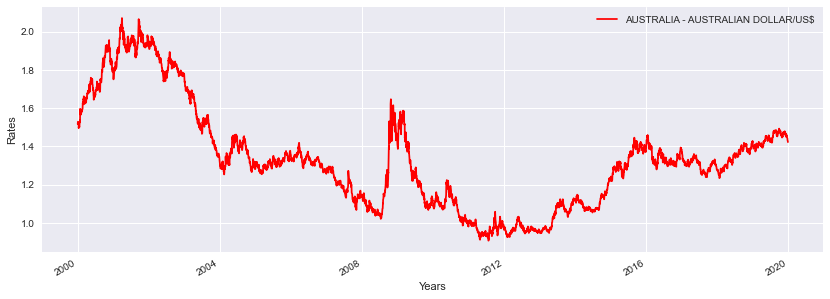

In [9]:
# plot the timeseries data with line plot

# list of colors which is cycled through no. of plots in this section
color=['red','green','blue', 'magenta'] 

# Plotting first column with plot width and height of 14 and 5 and color selected from the list 'color'
df.iloc[:, 0:1].plot(figsize=(14, 5), color=color[0])

# label of x-axis
plt.xlabel('Years') 
# label of y-axis
plt.ylabel('Rates') 

plt.show()

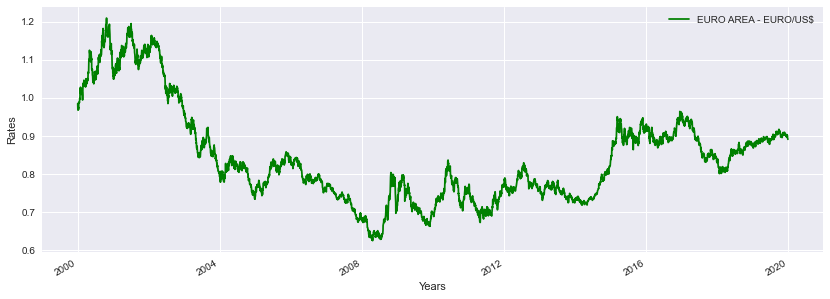

In [10]:
# plot the timeseries data with line plot
df.iloc[:, 1:2].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

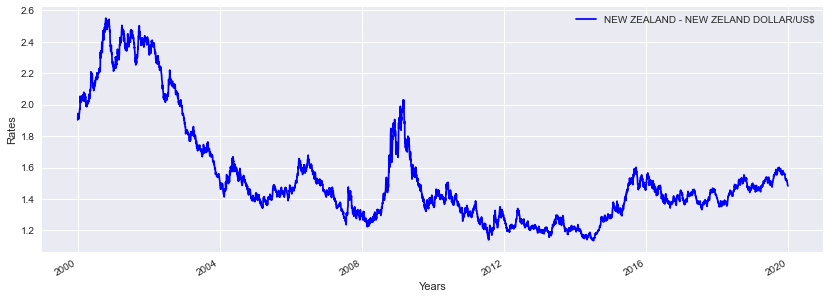

In [11]:
# plot the timeseries data with line plot
df.iloc[:, 2:3].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

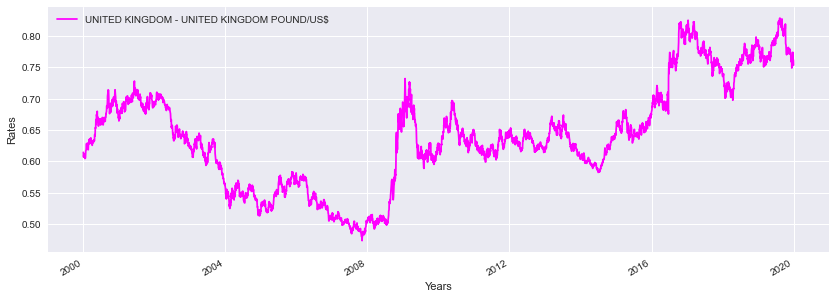

In [12]:
# plot the timeseries data with line plot
df.iloc[:, 3:4].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

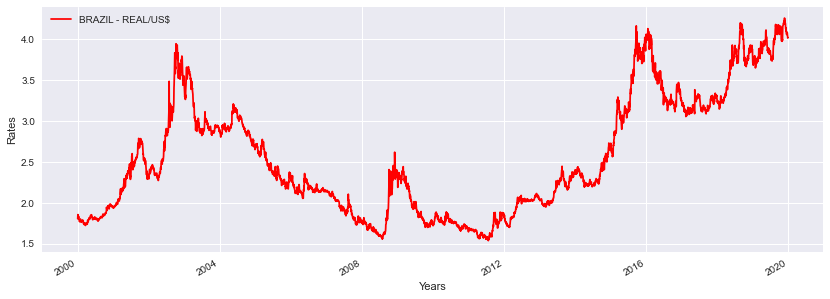

In [13]:
# plot the timeseries data with line plot
df.iloc[:, 4:5].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

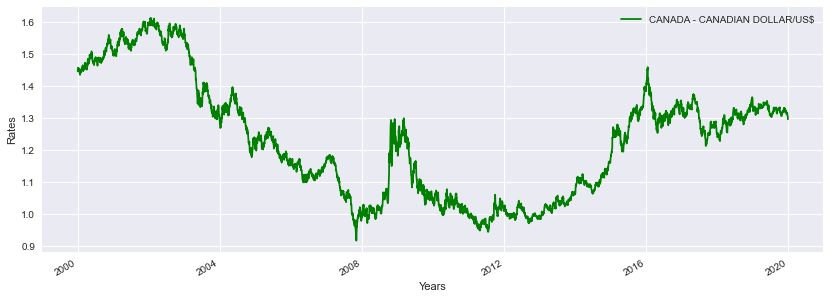

In [14]:
# plot the timeseries data with line plot
df.iloc[:, 5:6].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

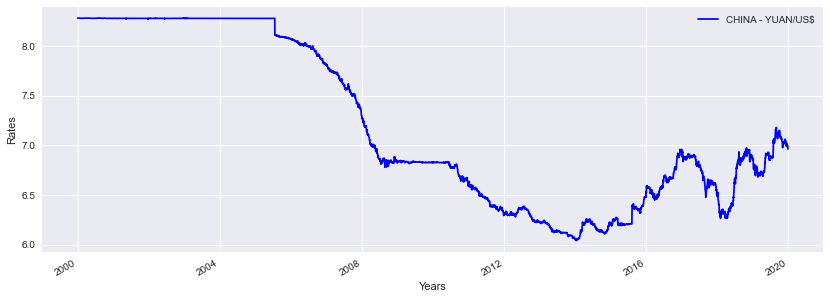

In [15]:
# plot the timeseries data with line plot
df.iloc[:, 6:7].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

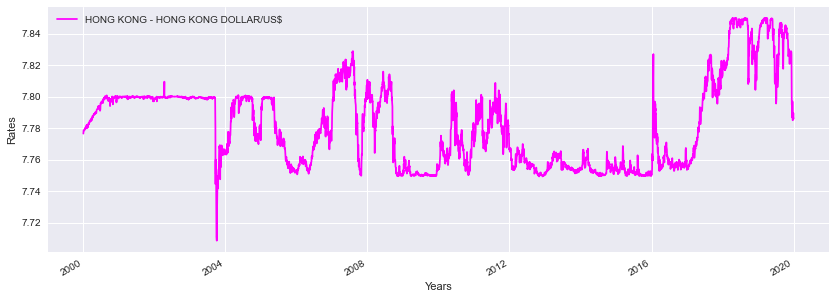

In [16]:
# plot the timeseries data with line plot
df.iloc[:, 7:8].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

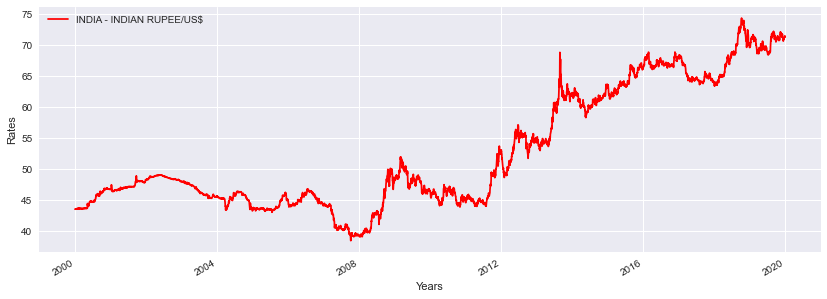

In [17]:
# plot the timeseries data with line plot
df.iloc[:, 8:9].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

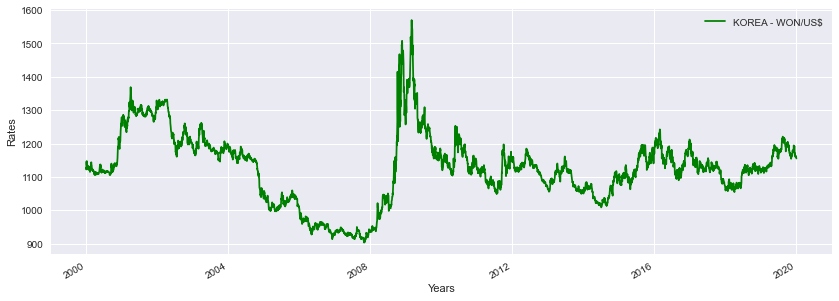

In [18]:
# plot the timeseries data with line plot
df.iloc[:, 9:10].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

Text(0, 0.5, 'Rates')

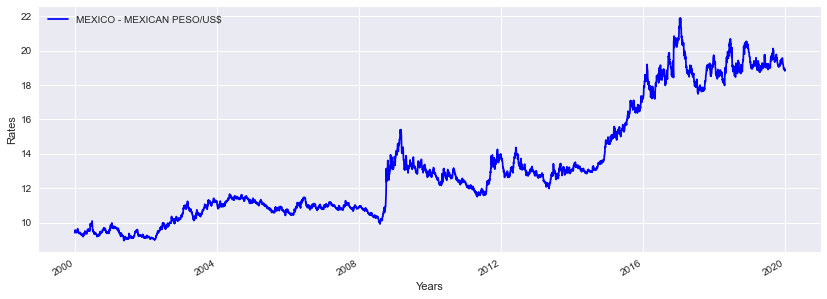

In [19]:
# plot the timeseries data with line plot
plot = df.iloc[:, 10:11].plot(figsize=(14, 5), color=color[2])
plot.set_xlabel('Years')
plot.set_ylabel('Rates')

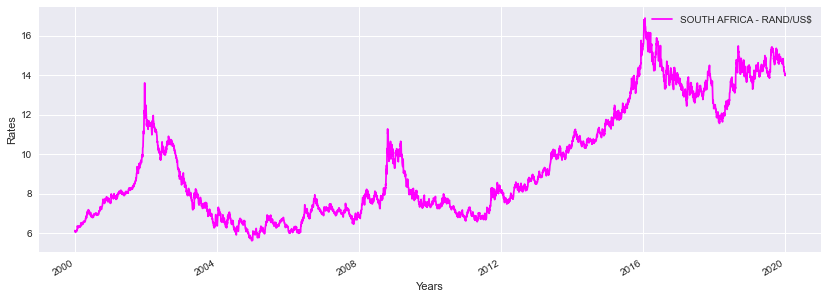

In [20]:
# plot the timeseries data with line plot
df.iloc[:, 11:12].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

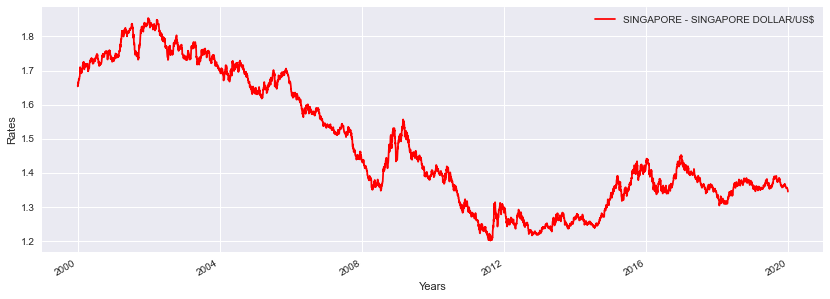

In [21]:
# plot the timeseries data with line plot
df.iloc[:, 12:13].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

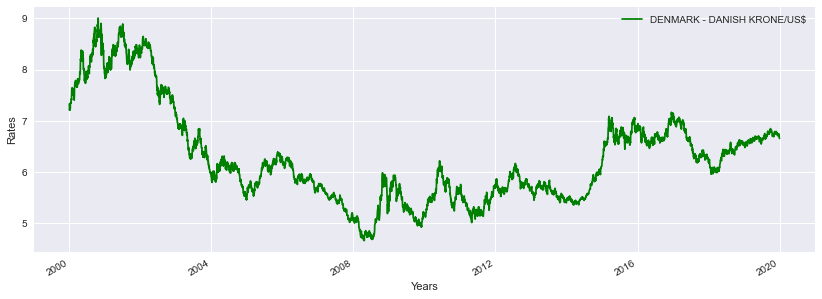

In [22]:
# plot the timeseries data with line plot
df.iloc[:, 13:14].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

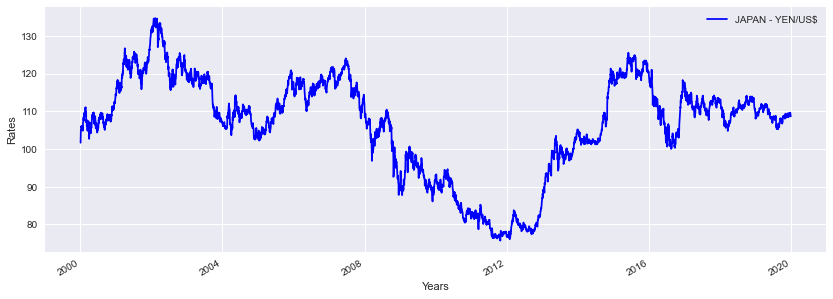

In [23]:
# plot the timeseries data with line plot
df.iloc[:, 14:15].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

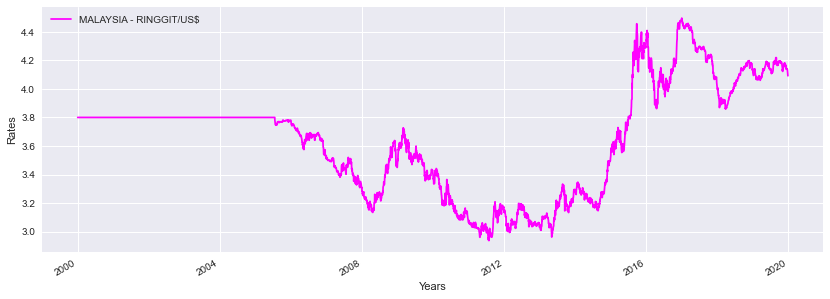

In [24]:
# plot the timeseries data with line plot
df.iloc[:, 15:16].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

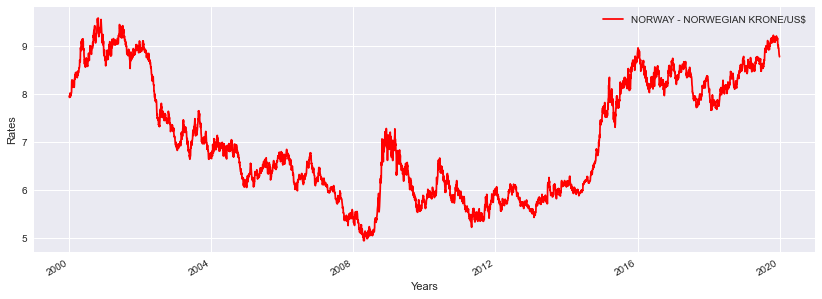

In [25]:
# plot the timeseries data with line plot
df.iloc[:, 16:17].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

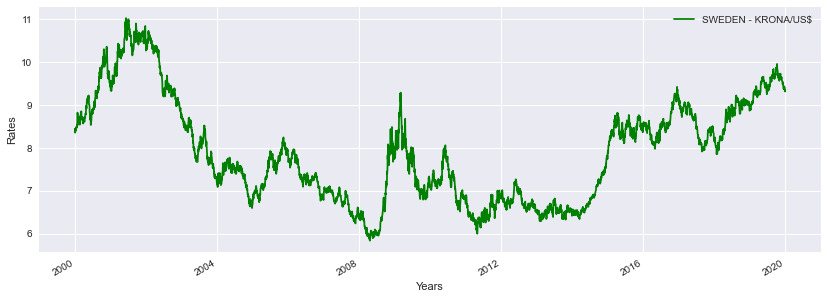

In [26]:
# plot the timeseries data with line plot
df.iloc[:, 17:18].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

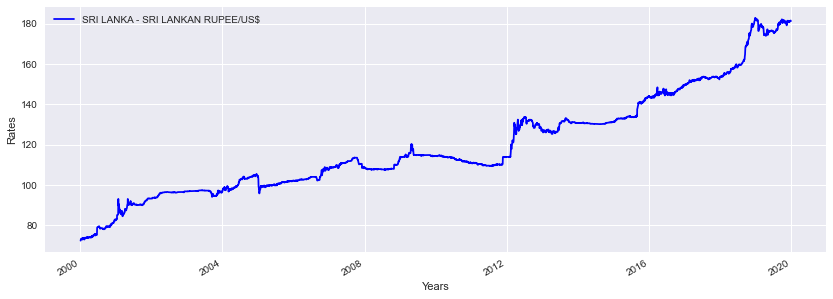

In [27]:
# plot the timeseries data with line plot
df.iloc[:, 18:19].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

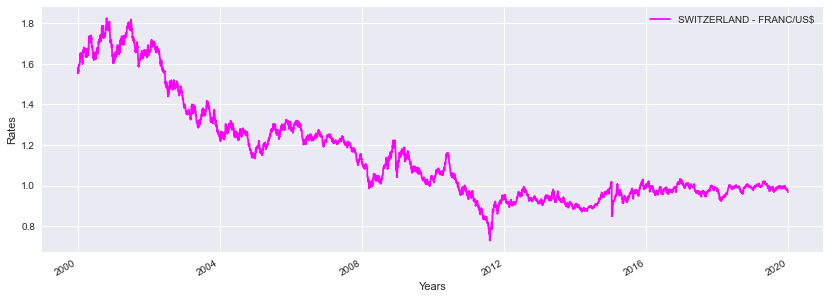

In [28]:
# plot the timeseries data with line plot
df.iloc[:, 19:20].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

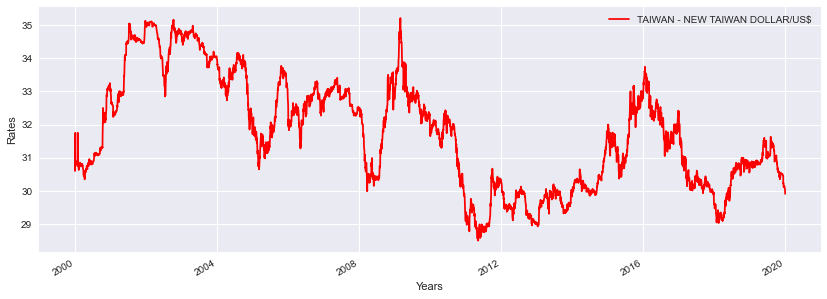

In [29]:
# plot the timeseries data with line plot
df.iloc[:, 20:21].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

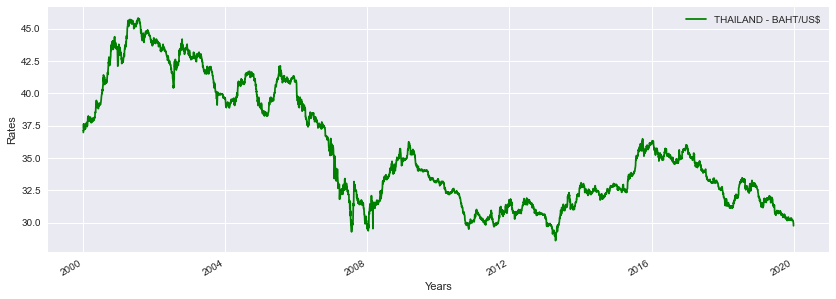

In [30]:
# plot the timeseries data with line plot
df.iloc[:, 21:22].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

## Visualization of Timeseries Analysis of Single Year

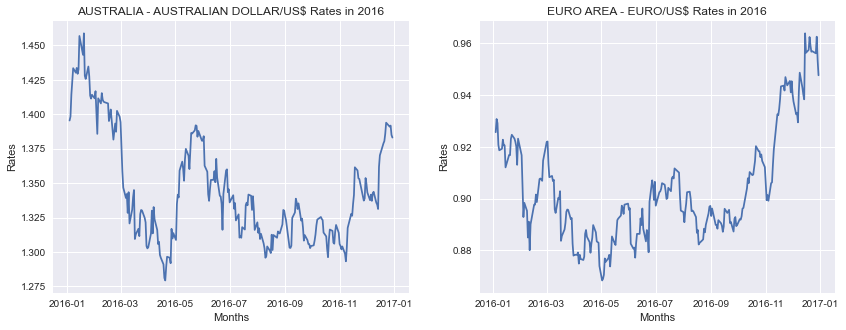

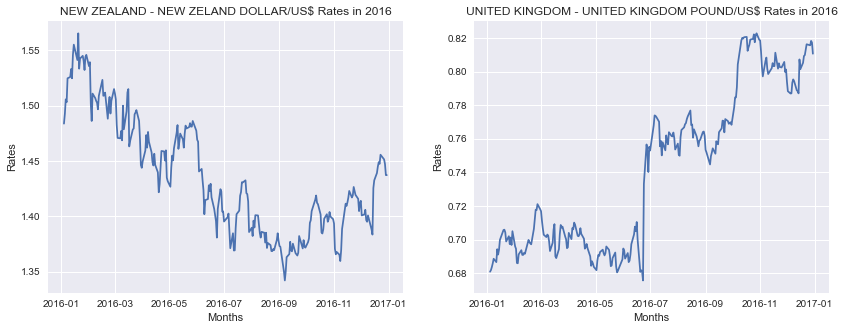

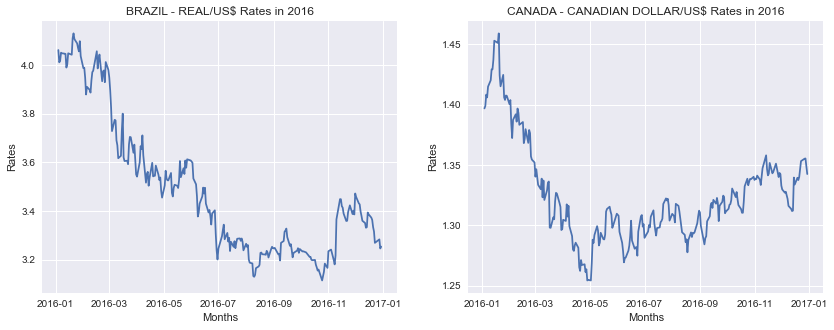

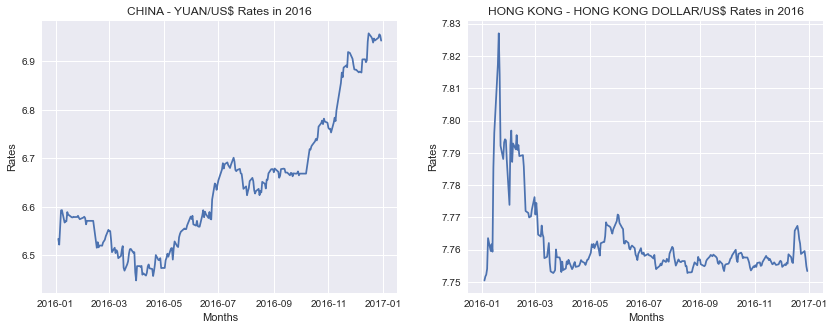

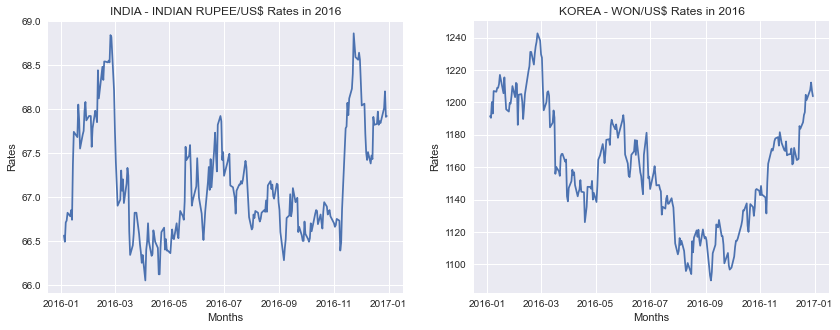

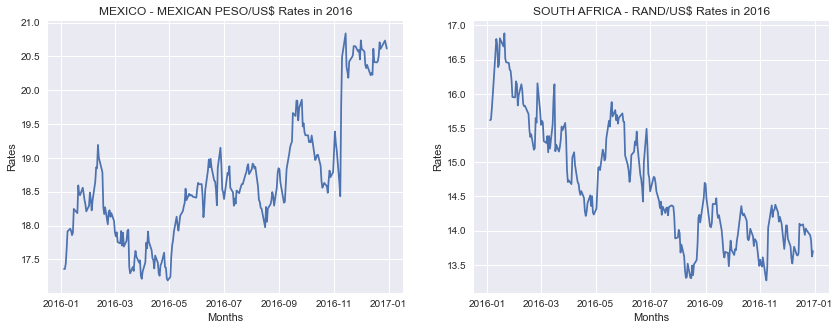

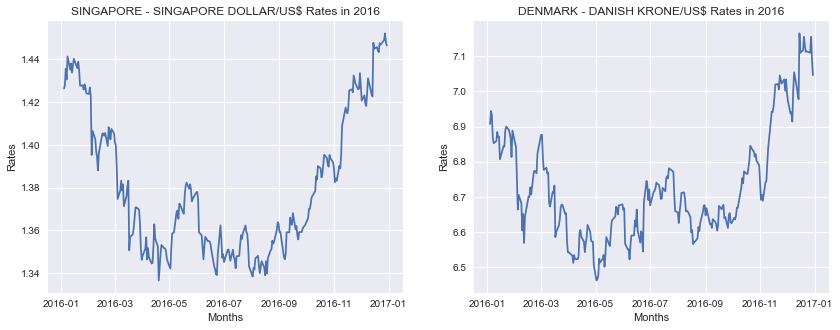

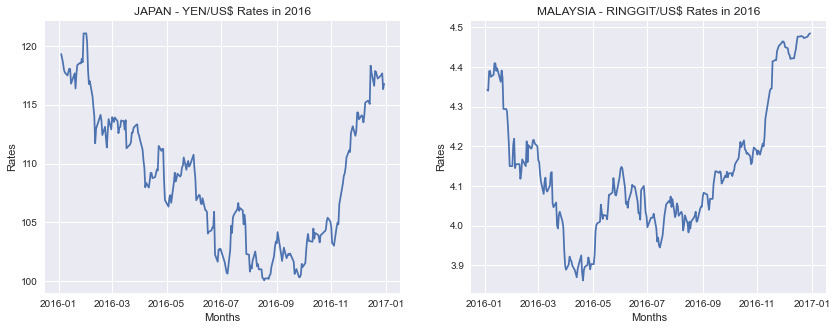

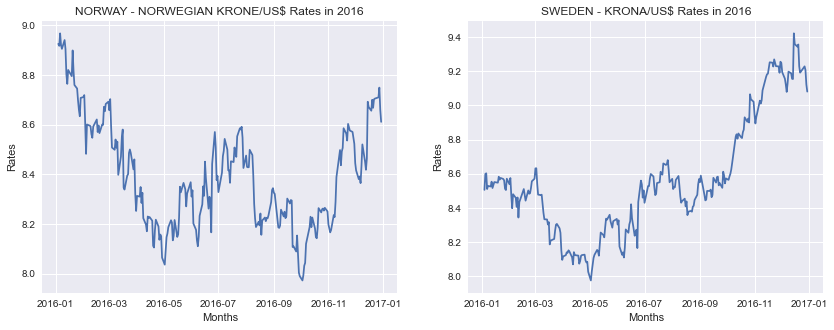

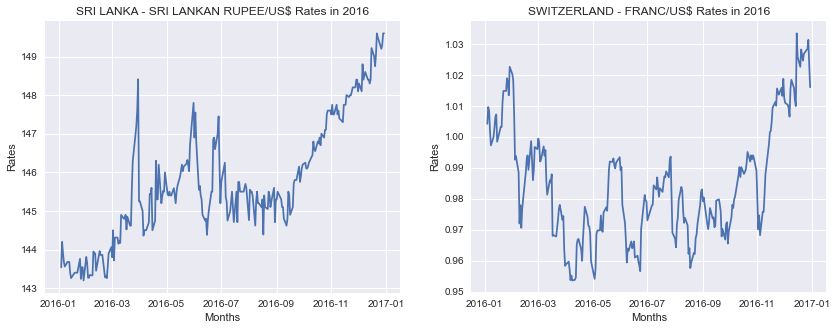

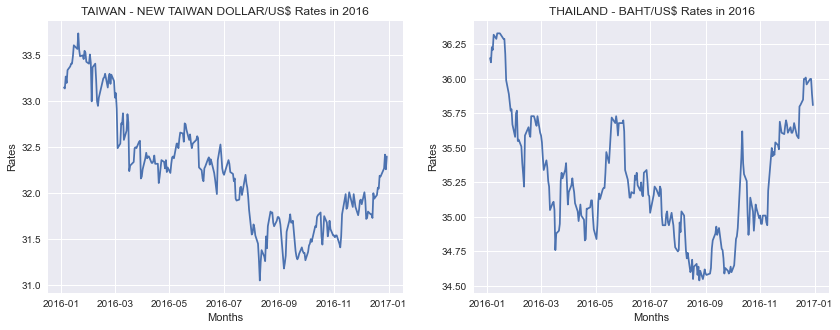

In [31]:
# plot the timeseries data with line plot

columns = df.columns

'''
This below for loop will loop through each 2 of columns of dataset and show subplots for both in single row separately 
(in 2 columns)

plt.subplot(1, 2, 1) - first parameter '1' is no. of rows we want in single figure or graph with subplots and 
                        second parameter '2' is no. of columns, finally third parameter '1' is subplot number

'''

for i in range(0, len(columns), 2):

    '''
    cols = columns[i:i+2] - In each iteration of for loop, this line will continously select 2 columns from list of columns 
    named 'columns' defined above in same cell (until the end of list) and create new dataframe with those 2 columns and 
    make it equal to 'data' variable which will later be used to define subplots containing those two columns
    '''
    
    cols = columns[i:i+2]
    data = df.loc['2016', cols]

    # setting the width and height of figure containing two subplots
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(data.iloc[:, 0])
    plt.xlabel('Months')
    plt.ylabel('Rates')
    plt.title(cols[0] + ' Rates in 2016')

    plt.subplot(1, 2, 2)
    plt.plot(data.iloc[:, 1])
    plt.title(cols[1] + ' Rates in 2016')
    plt.xlabel('Months')
    plt.ylabel('Rates')

    plt.show()

## Visualization of Timeseries Analysis of Dataset of Single Month

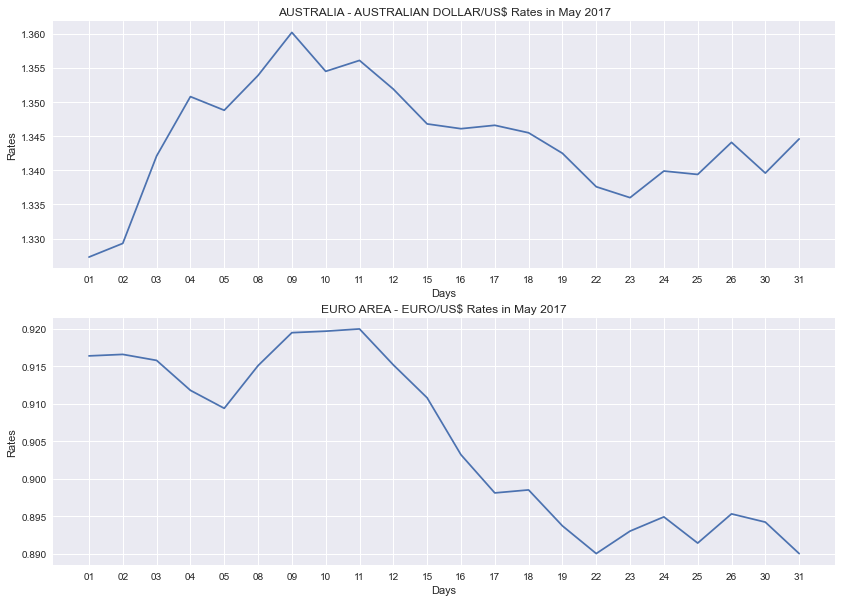

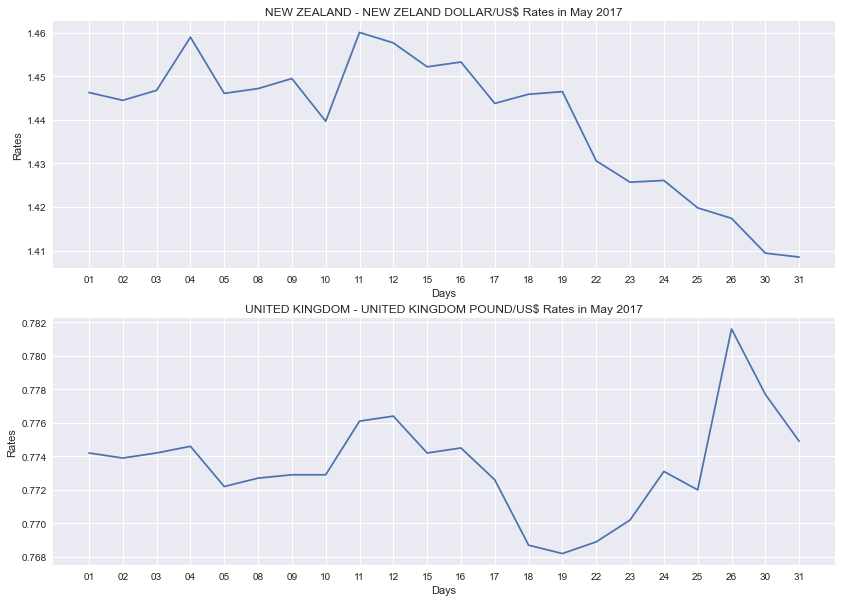

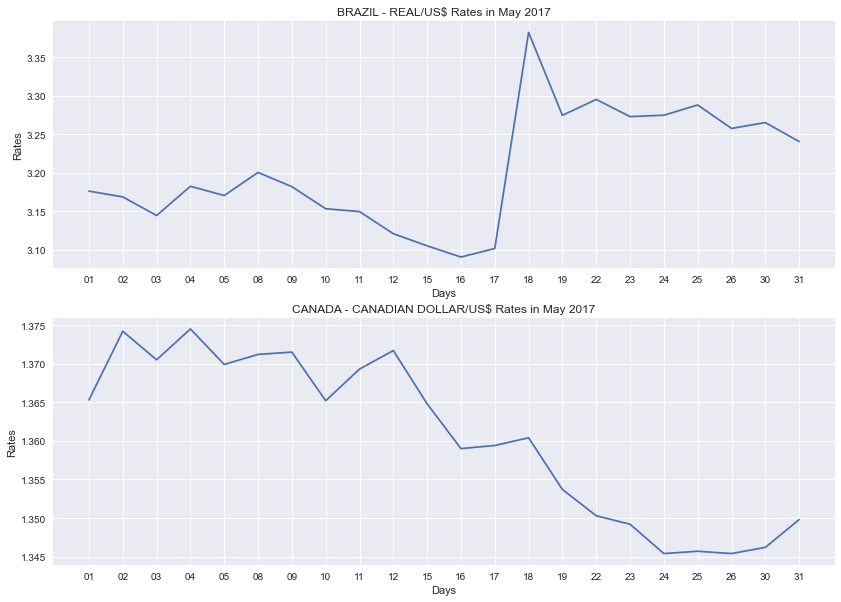

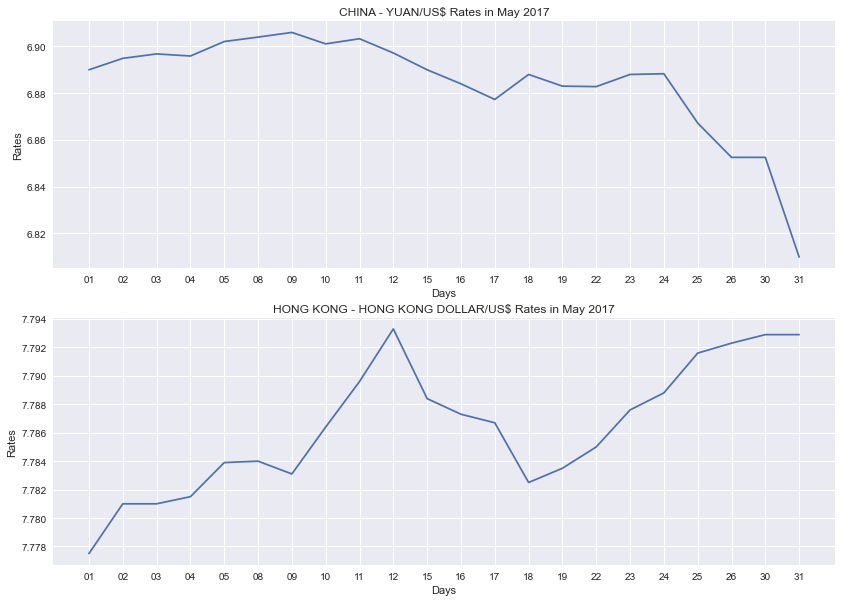

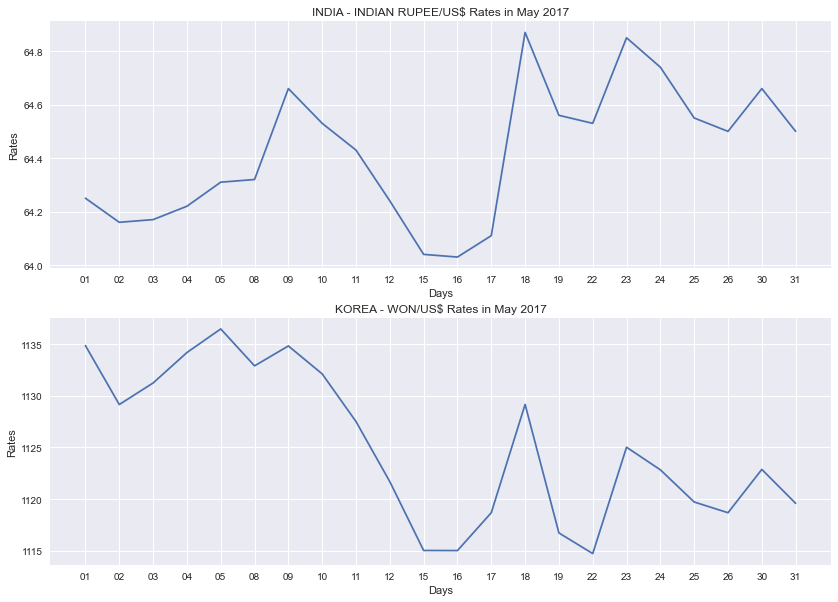

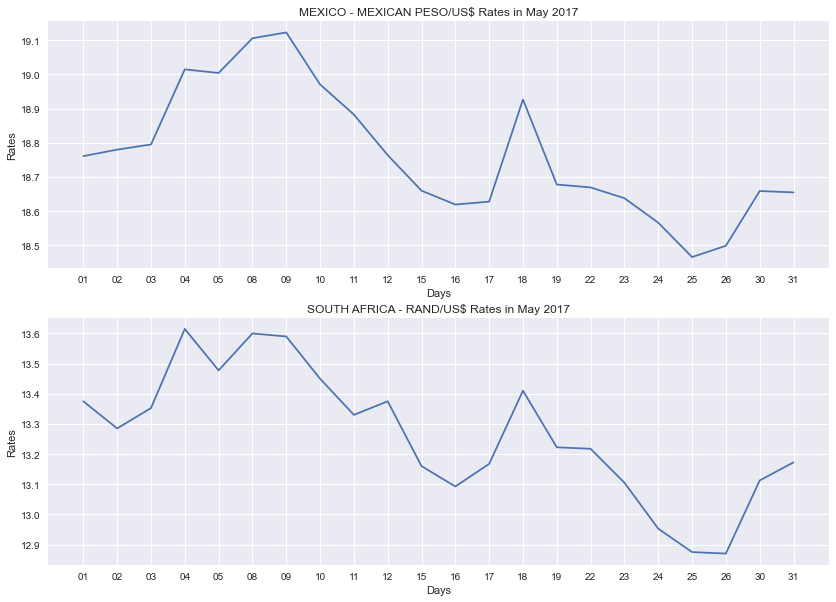

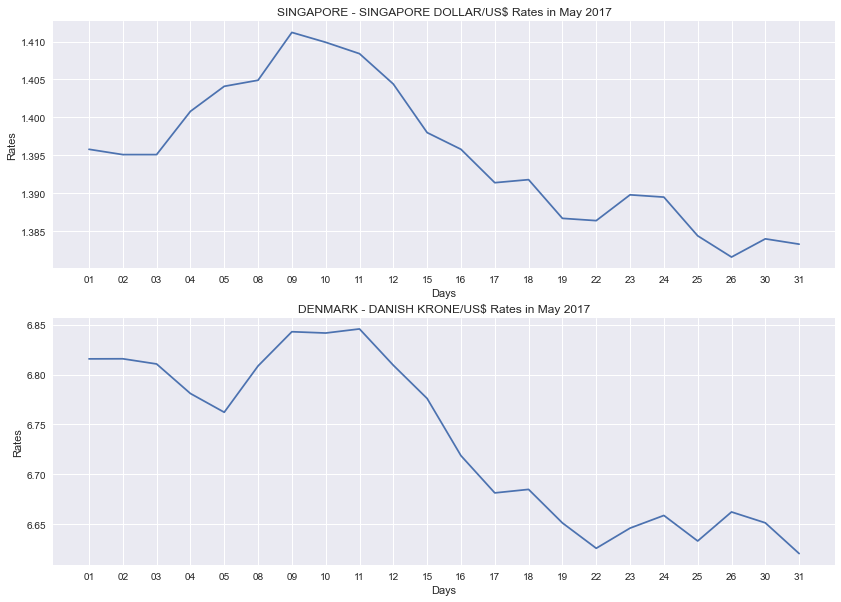

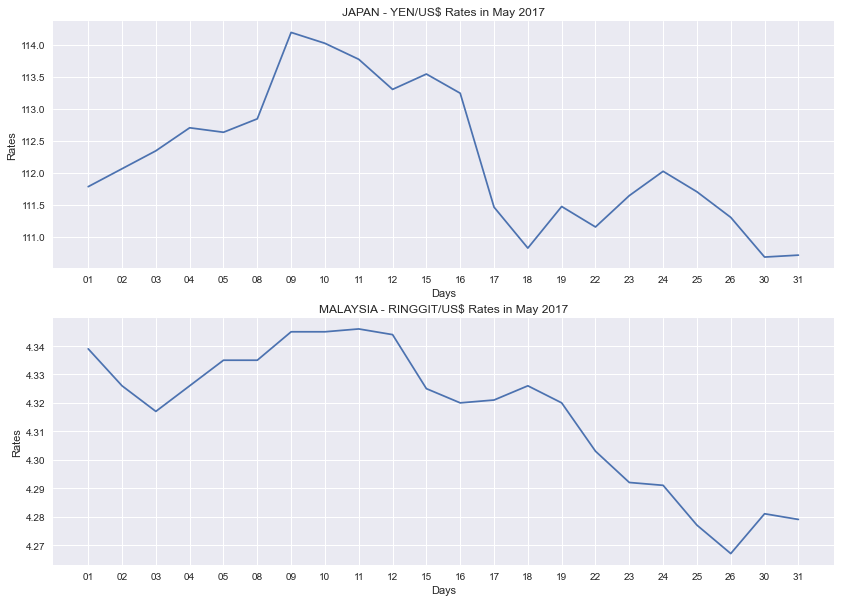

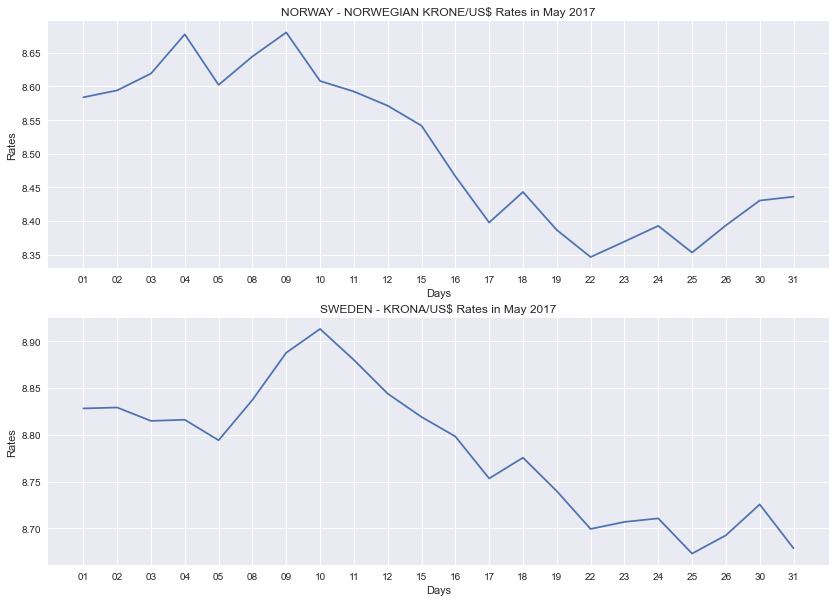

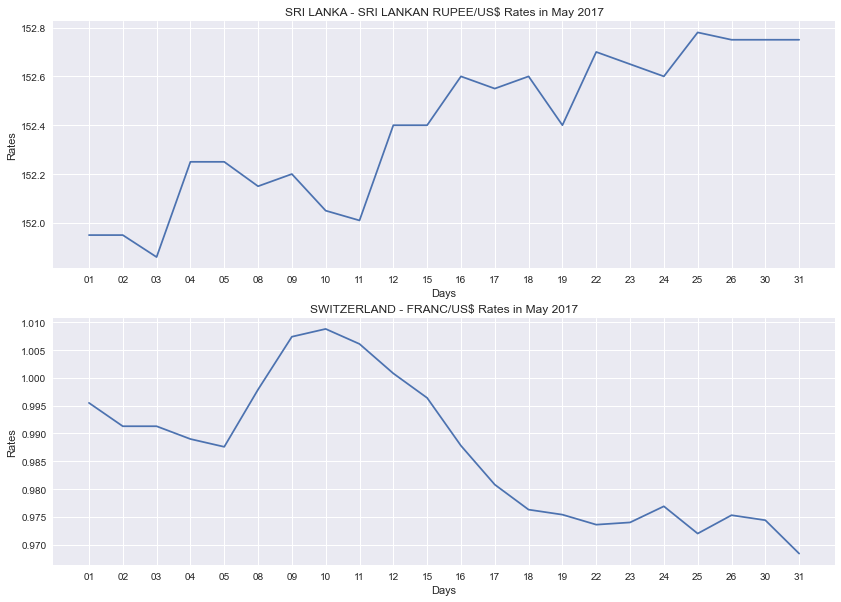

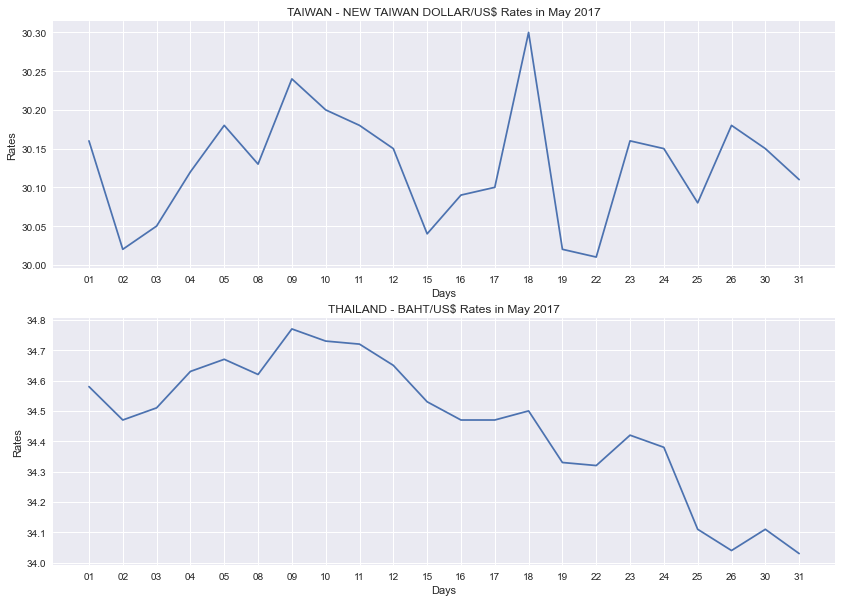

In [32]:
# plot the timeseries data with line plot

columns = df.columns

'''

plt.subplot(2, 1, 1) - Here instead of defining two subplots in single row with two columns, instead we're defining them 
                        in two rows with single column
                        
rest is following same pattern as defined in above cell

'''

for i in range(0, len(columns), 2):

    cols = columns[i:i+2]
    
    # Selecting Month of May in 2017
    data = df.loc['2017-05', cols]
    data.index = pd.to_datetime(data.index, format = '%m/%d/%Y').strftime('%d')    
    
    plt.figure(figsize=(14, 10))
    
    plt.subplot(2, 1, 1)
    plt.plot(data.iloc[:, 0])
    plt.xlabel('Days')
    plt.ylabel('Rates')
    plt.title(cols[0] + ' Rates in May 2017')

    plt.subplot(2, 1, 2)
    plt.plot(data.iloc[:, 1])
    plt.title(cols[1] + ' Rates in May 2017')
    plt.xlabel('Days')
    plt.ylabel('Rates')

    plt.show()

# APPLYING ARIMA MODEL (MACHINE LEARNING ALGORITHM) TO DATASET

## Exchange Rates Forecasting and Predictions Using Actual Data

In [33]:
'''

We are going to build ARIMA MODEL (MACHINE LEARNING Algorithm)  which is used mainly for analysing of timeseries data, 

specifically to forecast or predict future results of the data, e.g. forex exchange rates.

'''

def select_currency():
    """Function that prompts user to select any curreny exchange rate column from the dataset to make predictions on it"""
    global df
    selected_currency = None
    keys = np.arange(1, len(df.columns) + 1)
    columns = df.columns.values
    options = dict(zip(keys, columns))

    print('List of Currencies:\n')
    for key, value in options.items():
        print('{}: {}'.format(key, value))

    try:
        while True:
            user_input = int(input('\nSelect Any Currency: '))

            if user_input not in options.keys():
                print('Wrong Input. Try Again')
                continue
            else:
                selected_currency = options[user_input]
                break
    except:
        print('Wrong Input. Try Again')
        
    return selected_currency

In [36]:
def Make_ARIMA_Prediction(actual, P, D, Q):
    """Function that uses ARIMA MODEL to make predictions or forecast given currency exchange rate column from dataset"""
    model = ARIMA(actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction[0]
    
    
selected_currency = select_currency()
print('\nSelected Currency: ', selected_currency, '\n')

ExchangeRates = df.loc[:, selected_currency]
ExchangeRates = ExchangeRates[~np.isnan(ExchangeRates.values)]
ExchangeRates.index = pd.DatetimeIndex(ExchangeRates.index).to_period('D')

actual_data = ExchangeRates.values
total_elements = len(actual_data)

# Using 70% from data as training and other 30% for testing the model
training_size = int(total_elements * 0.7)
training_data = actual_data[0:training_size]
test_data = actual_data[training_size:total_elements]

# New lists to save actual and predicted values
actual_values = [i for i in training_data]
predicted_values = []

# Predict values in for loop using ARIMA MODEL
for days in range(len(test_data)):
    actual_value =  test_data[days]
    #forecast value
    prediction = Make_ARIMA_Prediction(actual_values, 2,1,0)
    print('Actual={:.5f} \t Predicted={:.5f}'.format(actual_value, prediction))
    #adding values in the list
    predicted_values.append(prediction)
    actual_values.append(actual_value)

# Print MSE to check how accurate model was
mse_error = mean_squared_error(test_data, predicted_values)

'''
MSE or Mean Squared Error used in statistics to estimate average of squared errors between actual and estimated values, 
e.g. here predicted values generated by ARIMA MODEL. 

It is used in Machine Learning models like ARIMA, to check the quality of the model that how accurate that model has 
generated predictions.

If Mean Squared Error value is non-negative and closest to zero than it means the model has high correctness or it has 
better accuracy in generating predictions or future values based on any given trained data.
'''

# Below line will show Mean Squared Error value of ARIMA MODEL used on given dataset
# the more the smaller Mean Squared Error is, the more the model is accurate
print('\nMean Squared Error: {:.4f}\n'.format(mse_error))


"""https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56"""


List of Currencies:

1: AUSTRALIA - AUSTRALIAN DOLLAR/US$
2: EURO AREA - EURO/US$
3: NEW ZEALAND - NEW ZELAND DOLLAR/US$
4: UNITED KINGDOM - UNITED KINGDOM POUND/US$
5: BRAZIL - REAL/US$
6: CANADA - CANADIAN DOLLAR/US$
7: CHINA - YUAN/US$
8: HONG KONG - HONG KONG DOLLAR/US$
9: INDIA - INDIAN RUPEE/US$
10: KOREA - WON/US$
11: MEXICO - MEXICAN PESO/US$
12: SOUTH AFRICA - RAND/US$
13: SINGAPORE - SINGAPORE DOLLAR/US$
14: DENMARK - DANISH KRONE/US$
15: JAPAN - YEN/US$
16: MALAYSIA - RINGGIT/US$
17: NORWAY - NORWEGIAN KRONE/US$
18: SWEDEN - KRONA/US$
19: SRI LANKA - SRI LANKAN RUPEE/US$
20: SWITZERLAND - FRANC/US$
21: TAIWAN - NEW TAIWAN DOLLAR/US$
22: THAILAND - BAHT/US$

Select Any Currency: 4

Selected Currency:  UNITED KINGDOM - UNITED KINGDOM POUND/US$ 

Actual=0.61140 	 Predicted=0.61141
Actual=0.61080 	 Predicted=0.61139
Actual=0.60880 	 Predicted=0.61079
Actual=0.60640 	 Predicted=0.60878
Actual=0.60530 	 Predicted=0.60638
Actual=0.60340 	 Predicted=0.60530
Actual=0.60820 	 Predicte

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.61220 	 Predicted=0.61074
Actual=0.60870 	 Predicted=0.61220


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.60720 	 Predicted=0.60866
Actual=0.60350 	 Predicted=0.60720
Actual=0.60200 	 Predicted=0.60347
Actual=0.60640 	 Predicted=0.60200
Actual=0.60280 	 Predicted=0.60645
Actual=0.60310 	 Predicted=0.60274
Actual=0.60380 	 Predicted=0.60311
Actual=0.60650 	 Predicted=0.60380


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.60790 	 Predicted=0.60652
Actual=0.61320 	 Predicted=0.60790
Actual=0.61350 	 Predicted=0.61325
Actual=0.61320 	 Predicted=0.61348
Actual=0.61180 	 Predicted=0.61320
Actual=0.60990 	 Predicted=0.61179
Actual=0.60910 	 Predicted=0.60989
Actual=0.60720 	 Predicted=0.60910
Actual=0.60320 	 Predicted=0.60718
Actual=0.60090 	 Predicted=0.60316
Actual=0.59750 	 Predicted=0.60089
Actual=0.59890 	 Predicted=0.59747
Actual=0.59820 	 Predicted=0.59892
Actual=0.60100 	 Predicted=0.59818
Actual=0.60130 	 Predicted=0.60103
Actual=0.60090 	 Predicted=0.60129
Actual=0.59890 	 Predicted=0.60089
Actual=0.60070 	 Predicted=0.59888
Actual=0.59910 	 Predicted=0.60072
Actual=0.59700 	 Predicted=0.59907
Actual=0.59840 	 Predicted=0.59698
Actual=0.60010 	 Predicted=0.59842
Actual=0.59780 	 Predicted=0.60011
Actual=0.59730 	 Predicted=0.59777
Actual=0.59790 	 Predicted=0.59730
Actual=0.60120 	 Predicted=0.59790
Actual=0.60140 	 Predicted=0.60123
Actual=0.60220 	 Predicted=0.60139
Actual=0.59960 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.59700 	 Predicted=0.59725
Actual=0.59590 	 Predicted=0.59701
Actual=0.59750 	 Predicted=0.59588
Actual=0.59730 	 Predicted=0.59751
Actual=0.59790 	 Predicted=0.59729
Actual=0.59550 	 Predicted=0.59790
Actual=0.59490 	 Predicted=0.59547
Actual=0.59550 	 Predicted=0.59490
Actual=0.59550 	 Predicted=0.59550


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.59410 	 Predicted=0.59549
Actual=0.59640 	 Predicted=0.59408
Actual=0.59530 	 Predicted=0.59642
Actual=0.59490 	 Predicted=0.59528
Actual=0.59480 	 Predicted=0.59489
Actual=0.59420 	 Predicted=0.59479
Actual=0.59230 	 Predicted=0.59419
Actual=0.59170 	 Predicted=0.59228
Actual=0.59290 	 Predicted=0.59169
Actual=0.59280 	 Predicted=0.59291
Actual=0.58910 	 Predicted=0.59279
Actual=0.58950 	 Predicted=0.58906
Actual=0.59020 	 Predicted=0.58951
Actual=0.59350 	 Predicted=0.59020
Actual=0.59270 	 Predicted=0.59352
Actual=0.59390 	 Predicted=0.59268
Actual=0.59580 	 Predicted=0.59391
Actual=0.59560 	 Predicted=0.59581
Actual=0.59430 	 Predicted=0.59559
Actual=0.59450 	 Predicted=0.59428


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.59360 	 Predicted=0.59450
Actual=0.59280 	 Predicted=0.59358
Actual=0.59320 	 Predicted=0.59279
Actual=0.59450 	 Predicted=0.59320
Actual=0.59520 	 Predicted=0.59451
Actual=0.59850 	 Predicted=0.59520
Actual=0.59810 	 Predicted=0.59853
Actual=0.59650 	 Predicted=0.59808
Actual=0.59680 	 Predicted=0.59648
Actual=0.59690 	 Predicted=0.59680
Actual=0.59710 	 Predicted=0.59690
Actual=0.59540 	 Predicted=0.59710
Actual=0.59550 	 Predicted=0.59538
Actual=0.59530 	 Predicted=0.59550
Actual=0.59690 	 Predicted=0.59529
Actual=0.59540 	 Predicted=0.59691
Actual=0.59340 	 Predicted=0.59538
Actual=0.58990 	 Predicted=0.59338
Actual=0.58870 	 Predicted=0.58986
Actual=0.58940 	 Predicted=0.58869
Actual=0.58990 	 Predicted=0.58940
Actual=0.58660 	 Predicted=0.58990
Actual=0.58780 	 Predicted=0.58656
Actual=0.58790 	 Predicted=0.58781
Actual=0.58920 	 Predicted=0.58789
Actual=0.58870 	 Predicted=0.58921
Actual=0.58760 	 Predicted=0.58868
Actual=0.58770 	 Predicted=0.58758
Actual=0.58460 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.62560 	 Predicted=0.62540
Actual=0.63040 	 Predicted=0.62561
Actual=0.63120 	 Predicted=0.63046
Actual=0.63060 	 Predicted=0.63120
Actual=0.63230 	 Predicted=0.63059
Actual=0.63630 	 Predicted=0.63233
Actual=0.63870 	 Predicted=0.63635
Actual=0.63920 	 Predicted=0.63872
Actual=0.63910 	 Predicted=0.63920
Actual=0.63820 	 Predicted=0.63910
Actual=0.63760 	 Predicted=0.63820
Actual=0.63810 	 Predicted=0.63760
Actual=0.63690 	 Predicted=0.63811
Actual=0.63640 	 Predicted=0.63689
Actual=0.63340 	 Predicted=0.63640
Actual=0.63950 	 Predicted=0.63337
Actual=0.63520 	 Predicted=0.63958
Actual=0.63890 	 Predicted=0.63514
Actual=0.63690 	 Predicted=0.63896
Actual=0.63670 	 Predicted=0.63688
Actual=0.64100 	 Predicted=0.63671
Actual=0.64000 	 Predicted=0.64105
Actual=0.63720 	 Predicted=0.63999
Actual=0.63740 	 Predicted=0.63718
Actual=0.63650 	 Predicted=0.63742
Actual=0.63580 	 Predicted=0.63650
Actual=0.63840 	 Predicted=0.63580
Actual=0.63550 	 Predicted=0.63843
Actual=0.63890 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.65640 	 Predicted=0.65941
Actual=0.65960 	 Predicted=0.65638
Actual=0.66090 	 Predicted=0.65965
Actual=0.65950 	 Predicted=0.66092
Actual=0.66150 	 Predicted=0.65949
Actual=0.66440 	 Predicted=0.66154
Actual=0.66570 	 Predicted=0.66444
Actual=0.66280 	 Predicted=0.66572
Actual=0.65810 	 Predicted=0.66278
Actual=0.65940 	 Predicted=0.65807
Actual=0.66480 	 Predicted=0.65944
Actual=0.66550 	 Predicted=0.66487
Actual=0.66550 	 Predicted=0.66551
Actual=0.66100 	 Predicted=0.66551
Actual=0.65750 	 Predicted=0.66096
Actual=0.65390 	 Predicted=0.65748
Actual=0.65590 	 Predicted=0.65388
Actual=0.65720 	 Predicted=0.65594


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.65570 	 Predicted=0.65722
Actual=0.65650 	 Predicted=0.65569
Actual=0.65020 	 Predicted=0.65652
Actual=0.64960 	 Predicted=0.65014
Actual=0.65150 	 Predicted=0.64962
Actual=0.64810 	 Predicted=0.65153
Actual=0.64720 	 Predicted=0.64807
Actual=0.65000 	 Predicted=0.64721
Actual=0.64660 	 Predicted=0.65004
Actual=0.64790 	 Predicted=0.64656
Actual=0.64520 	 Predicted=0.64793
Actual=0.64830 	 Predicted=0.64518
Actual=0.64770 	 Predicted=0.64835
Actual=0.65060 	 Predicted=0.64769
Actual=0.64970 	 Predicted=0.65064
Actual=0.65510 	 Predicted=0.64969
Actual=0.65660 	 Predicted=0.65517
Actual=0.66390 	 Predicted=0.65662
Actual=0.66240 	 Predicted=0.66399
Actual=0.66290 	 Predicted=0.66239
Actual=0.66910 	 Predicted=0.66292
Actual=0.67080 	 Predicted=0.66918
Actual=0.67770 	 Predicted=0.67082


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.67570 	 Predicted=0.67779
Actual=0.67820 	 Predicted=0.67569
Actual=0.68090 	 Predicted=0.67824
Actual=0.67890 	 Predicted=0.68095
Actual=0.67010 	 Predicted=0.67889
Actual=0.66950 	 Predicted=0.67002
Actual=0.67250 	 Predicted=0.66952
Actual=0.67050 	 Predicted=0.67255


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.67370 	 Predicted=0.67049


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.67210 	 Predicted=0.67375
Actual=0.67600 	 Predicted=0.67209
Actual=0.67340 	 Predicted=0.67606
Actual=0.67460 	 Predicted=0.67338
Actual=0.67380 	 Predicted=0.67463
Actual=0.67040 	 Predicted=0.67381
Actual=0.66850 	 Predicted=0.67038
Actual=0.67310 	 Predicted=0.66850


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.67010 	 Predicted=0.67316
Actual=0.67850 	 Predicted=0.67008
Actual=0.68270 	 Predicted=0.67860
Actual=0.68220 	 Predicted=0.68276
Actual=0.67610 	 Predicted=0.68221
Actual=0.67650 	 Predicted=0.67605
Actual=0.67010 	 Predicted=0.67653
Actual=0.66930 	 Predicted=0.67005
Actual=0.67060 	 Predicted=0.66931
Actual=0.66920 	 Predicted=0.67063
Actual=0.66550 	 Predicted=0.66920
Actual=0.66460 	 Predicted=0.66548
Actual=0.65890 	 Predicted=0.66461
Actual=0.65640 	 Predicted=0.65885
Actual=0.65240 	 Predicted=0.65638
Actual=0.64580 	 Predicted=0.65236
Actual=0.65240 	 Predicted=0.64573
Actual=0.66060 	 Predicted=0.65248
Actual=0.66150 	 Predicted=0.66070
Actual=0.65880 	 Predicted=0.66152
Actual=0.65600 	 Predicted=0.65878
Actual=0.65690 	 Predicted=0.65598
Actual=0.64700 	 Predicted=0.65692
Actual=0.64130 	 Predicted=0.64689
Actual=0.63760 	 Predicted=0.64124


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.63500 	 Predicted=0.63756
Actual=0.63430 	 Predicted=0.63497
Actual=0.63400 	 Predicted=0.63430
Actual=0.63780 	 Predicted=0.63400
Actual=0.64420 	 Predicted=0.63786
Actual=0.64330 	 Predicted=0.64430
Actual=0.63810 	 Predicted=0.64330


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.64580 	 Predicted=0.63803
Actual=0.64940 	 Predicted=0.64591
Actual=0.65260 	 Predicted=0.64945
Actual=0.65400 	 Predicted=0.65265
Actual=0.65420 	 Predicted=0.65403
Actual=0.65850 	 Predicted=0.65421
Actual=0.65230 	 Predicted=0.65857
Actual=0.65140 	 Predicted=0.65223
Actual=0.65070 	 Predicted=0.65140
Actual=0.65500 	 Predicted=0.65070
Actual=0.65450 	 Predicted=0.65507
Actual=0.65010 	 Predicted=0.65450
Actual=0.64390 	 Predicted=0.65005
Actual=0.64550 	 Predicted=0.64382
Actual=0.64160 	 Predicted=0.64554
Actual=0.64220 	 Predicted=0.64155
Actual=0.63950 	 Predicted=0.64222
Actual=0.63660 	 Predicted=0.63947
Actual=0.62960 	 Predicted=0.63657
Actual=0.62970 	 Predicted=0.62951
Actual=0.63200 	 Predicted=0.62970
Actual=0.63490 	 Predicted=0.63204
Actual=0.63770 	 Predicted=0.63495
Actual=0.63580 	 Predicted=0.63775
Actual=0.63540 	 Predicted=0.63578
Actual=0.63440 	 Predicted=0.63540
Actual=0.63580 	 Predicted=0.63439
Actual=0.64030 	 Predicted=0.63583
Actual=0.64050 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.64160 	 Predicted=0.63999
Actual=0.64310 	 Predicted=0.64163


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.64030 	 Predicted=0.64313
Actual=0.64380 	 Predicted=0.64026
Actual=0.64460 	 Predicted=0.64386
Actual=0.64120 	 Predicted=0.64462
Actual=0.64030 	 Predicted=0.64116
Actual=0.64000 	 Predicted=0.64030
Actual=0.64180 	 Predicted=0.64000
Actual=0.63960 	 Predicted=0.64183
Actual=0.64090 	 Predicted=0.63957
Actual=0.64050 	 Predicted=0.64093


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.64090 	 Predicted=0.64050
Actual=0.64430 	 Predicted=0.64091
Actual=0.64650 	 Predicted=0.64436
Actual=0.64330 	 Predicted=0.64654
Actual=0.64220 	 Predicted=0.64326
Actual=0.63940 	 Predicted=0.64219


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.64120 	 Predicted=0.63937
Actual=0.64000 	 Predicted=0.64124
Actual=0.64110 	 Predicted=0.63999
Actual=0.63870 	 Predicted=0.64112
Actual=0.63920 	 Predicted=0.63867
Actual=0.63740 	 Predicted=0.63921
Actual=0.63700 	 Predicted=0.63738
Actual=0.63570 	 Predicted=0.63700
Actual=0.63700 	 Predicted=0.63569
Actual=0.64550 	 Predicted=0.63703
Actual=0.64890 	 Predicted=0.64563
Actual=0.65100 	 Predicted=0.64895


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.65090 	 Predicted=0.65104
Actual=0.65180 	 Predicted=0.65091
Actual=0.65320 	 Predicted=0.65182
Actual=0.65560 	 Predicted=0.65323
Actual=0.65810 	 Predicted=0.65565
Actual=0.65020 	 Predicted=0.65815
Actual=0.65090 	 Predicted=0.65009
Actual=0.64700 	 Predicted=0.65092
Actual=0.64830 	 Predicted=0.64695
Actual=0.64840 	 Predicted=0.64833
Actual=0.65140 	 Predicted=0.64841
Actual=0.64520 	 Predicted=0.65145
Actual=0.64480 	 Predicted=0.64512
Actual=0.64210 	 Predicted=0.64480
Actual=0.64490 	 Predicted=0.64207
Actual=0.65120 	 Predicted=0.64495
Actual=0.65600 	 Predicted=0.65130
Actual=0.65560 	 Predicted=0.65609
Actual=0.65910 	 Predicted=0.65561


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.65750 	 Predicted=0.65916
Actual=0.65930 	 Predicted=0.65749
Actual=0.66160 	 Predicted=0.65934
Actual=0.65950 	 Predicted=0.66165


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.65720 	 Predicted=0.65948
Actual=0.65940 	 Predicted=0.65717
Actual=0.65670 	 Predicted=0.65944
Actual=0.65300 	 Predicted=0.65667
Actual=0.65290 	 Predicted=0.65295
Actual=0.65300 	 Predicted=0.65291
Actual=0.65610 	 Predicted=0.65301
Actual=0.64750 	 Predicted=0.65616
Actual=0.64620 	 Predicted=0.64738
Actual=0.64760 	 Predicted=0.64619
Actual=0.64640 	 Predicted=0.64763
Actual=0.64640 	 Predicted=0.64639
Actual=0.64670 	 Predicted=0.64641


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.64940 	 Predicted=0.64671


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.65190 	 Predicted=0.64945
Actual=0.65100 	 Predicted=0.65195
Actual=0.65310 	 Predicted=0.65100
Actual=0.65280 	 Predicted=0.65314
Actual=0.65380 	 Predicted=0.65281
Actual=0.64750 	 Predicted=0.65382
Actual=0.64820 	 Predicted=0.64742
Actual=0.64920 	 Predicted=0.64822
Actual=0.65030 	 Predicted=0.64922
Actual=0.65630 	 Predicted=0.65033
Actual=0.66350 	 Predicted=0.65640
Actual=0.66120 	 Predicted=0.66363
Actual=0.66180 	 Predicted=0.66118
Actual=0.65760 	 Predicted=0.66182
Actual=0.65750 	 Predicted=0.65755
Actual=0.65770 	 Predicted=0.65751
Actual=0.65730 	 Predicted=0.65771
Actual=0.65750 	 Predicted=0.65730
Actual=0.65240 	 Predicted=0.65751
Actual=0.65790 	 Predicted=0.65233
Actual=0.66120 	 Predicted=0.65799
Actual=0.66410 	 Predicted=0.66126
Actual=0.66190 	 Predicted=0.66416


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.66490 	 Predicted=0.66188
Actual=0.66470 	 Predicted=0.66496
Actual=0.66340 	 Predicted=0.66471
Actual=0.66990 	 Predicted=0.66339
Actual=0.66280 	 Predicted=0.67001
Actual=0.66230 	 Predicted=0.66272
Actual=0.66330 	 Predicted=0.66230
Actual=0.66670 	 Predicted=0.66333
Actual=0.65930 	 Predicted=0.66676
Actual=0.65890 	 Predicted=0.65921
Actual=0.65730 	 Predicted=0.65890
Actual=0.66090 	 Predicted=0.65729
Actual=0.66470 	 Predicted=0.66096
Actual=0.66610 	 Predicted=0.66477
Actual=0.67220 	 Predicted=0.66613
Actual=0.67050 	 Predicted=0.67230
Actual=0.67090 	 Predicted=0.67049
Actual=0.67520 	 Predicted=0.67092
Actual=0.67280 	 Predicted=0.67527
Actual=0.66920 	 Predicted=0.67278
Actual=0.67190 	 Predicted=0.66916
Actual=0.67590 	 Predicted=0.67195
Actual=0.67420 	 Predicted=0.67597
Actual=0.67820 	 Predicted=0.67419
Actual=0.68090 	 Predicted=0.67827
Actual=0.68190 	 Predicted=0.68095
Actual=0.68370 	 Predicted=0.68193
Actual=0.68590 	 Predicted=0.68374


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.68860 	 Predicted=0.68595
Actual=0.68660 	 Predicted=0.68866
Actual=0.69430 	 Predicted=0.68659
Actual=0.69110 	 Predicted=0.69442
Actual=0.69400 	 Predicted=0.69108
Actual=0.69980 	 Predicted=0.69405
Actual=0.70570 	 Predicted=0.69990
Actual=0.70590 	 Predicted=0.70581
Actual=0.70430 	 Predicted=0.70593
Actual=0.69890 	 Predicted=0.70430
Actual=0.70200 	 Predicted=0.69884
Actual=0.69730 	 Predicted=0.70206
Actual=0.70120 	 Predicted=0.69726
Actual=0.69680 	 Predicted=0.70126
Actual=0.70500 	 Predicted=0.69677
Actual=0.69600 	 Predicted=0.70511
Actual=0.69450 	 Predicted=0.69595
Actual=0.68610 	 Predicted=0.69447
Actual=0.68590 	 Predicted=0.68602
Actual=0.69120 	 Predicted=0.68588
Actual=0.69370 	 Predicted=0.69128


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.69090 	 Predicted=0.69377
Actual=0.69090 	 Predicted=0.69090
Actual=0.69210 	 Predicted=0.69091
Actual=0.69160 	 Predicted=0.69213
Actual=0.69980 	 Predicted=0.69162
Actual=0.69850 	 Predicted=0.69991
Actual=0.69770 	 Predicted=0.69854
Actual=0.69720 	 Predicted=0.69771
Actual=0.70640 	 Predicted=0.69721
Actual=0.71230 	 Predicted=0.70652
Actual=0.71780 	 Predicted=0.71242
Actual=0.71750 	 Predicted=0.71792
Actual=0.72110 	 Predicted=0.71754
Actual=0.71810 	 Predicted=0.72117
Actual=0.71690 	 Predicted=0.71810
Actual=0.71130 	 Predicted=0.71690
Actual=0.70660 	 Predicted=0.71125
Actual=0.70290 	 Predicted=0.70654
Actual=0.70150 	 Predicted=0.70285
Actual=0.70300 	 Predicted=0.70148
Actual=0.70240 	 Predicted=0.70303
Actual=0.69900 	 Predicted=0.70242
Actual=0.69320 	 Predicted=0.69897
Actual=0.69810 	 Predicted=0.69312
Actual=0.70590 	 Predicted=0.69816
Actual=0.70920 	 Predicted=0.70605
Actual=0.69010 	 Predicted=0.70930
Actual=0.68900 	 Predicted=0.68988
Actual=0.69430 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.70030 	 Predicted=0.70415
Actual=0.70680 	 Predicted=0.70026
Actual=0.70610 	 Predicted=0.70691


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.71010 	 Predicted=0.70612
Actual=0.70900 	 Predicted=0.71018
Actual=0.70220 	 Predicted=0.70901
Actual=0.70200 	 Predicted=0.70213
Actual=0.70310 	 Predicted=0.70201
Actual=0.70680 	 Predicted=0.70314


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.70340 	 Predicted=0.70687
Actual=0.70050 	 Predicted=0.70338
Actual=0.69460 	 Predicted=0.70048


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.69570 	 Predicted=0.69453
Actual=0.69740 	 Predicted=0.69573
Actual=0.69490 	 Predicted=0.69744
Actual=0.69000 	 Predicted=0.69488
Actual=0.68440 	 Predicted=0.68995


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.68710 	 Predicted=0.68433
Actual=0.68580 	 Predicted=0.68716
Actual=0.68380 	 Predicted=0.68580
Actual=0.68180 	 Predicted=0.68379
Actual=0.68760 	 Predicted=0.68179
Actual=0.69080 	 Predicted=0.68770
Actual=0.69030 	 Predicted=0.69086
Actual=0.69260 	 Predicted=0.69031


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.69400 	 Predicted=0.69265


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.69190 	 Predicted=0.69404
Actual=0.69060 	 Predicted=0.69189
Actual=0.69190 	 Predicted=0.69060
Actual=0.69590 	 Predicted=0.69194
Actual=0.69390 	 Predicted=0.69598
Actual=0.69040 	 Predicted=0.69389
Actual=0.68420 	 Predicted=0.69037
Actual=0.68460 	 Predicted=0.68412
Actual=0.68900 	 Predicted=0.68463
Actual=0.69230 	 Predicted=0.68908


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.68390 	 Predicted=0.69237
Actual=0.68050 	 Predicted=0.68379
Actual=0.68150 	 Predicted=0.68048
Actual=0.68290 	 Predicted=0.68154
Actual=0.68820 	 Predicted=0.68294
Actual=0.69470 	 Predicted=0.68830


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.69350 	 Predicted=0.69481
Actual=0.68870 	 Predicted=0.69349
Actual=0.69200 	 Predicted=0.68864
Actual=0.68660 	 Predicted=0.69208
Actual=0.68750 	 Predicted=0.68653
Actual=0.69120 	 Predicted=0.68754
Actual=0.69730 	 Predicted=0.69127
Actual=0.70310 	 Predicted=0.69741
Actual=0.70770 	 Predicted=0.70320
Actual=0.70500 	 Predicted=0.70779
Actual=0.71050 	 Predicted=0.70497
Actual=0.70000 	 Predicted=0.71062
Actual=0.68080 	 Predicted=0.69986
Actual=0.68180 	 Predicted=0.68048
Actual=0.68110 	 Predicted=0.68189
Actual=0.67570 	 Predicted=0.68110
Actual=0.73320 	 Predicted=0.67562
Actual=0.75660 	 Predicted=0.73399
Actual=0.75220 	 Predicted=0.75712
Actual=0.74020 	 Predicted=0.75184
Actual=0.75520 	 Predicted=0.73989
Actual=0.75300 	 Predicted=0.75589
Actual=0.76800 	 Predicted=0.75274
Actual=0.77390 	 Predicted=0.76851


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77360 	 Predicted=0.77394
Actual=0.77290 	 Predicted=0.77356
Actual=0.77010 	 Predicted=0.77292
Actual=0.75550 	 Predicted=0.77006
Actual=0.75870 	 Predicted=0.75510
Actual=0.75010 	 Predicted=0.75901
Actual=0.75790 	 Predicted=0.74984
Actual=0.75310 	 Predicted=0.75824
Actual=0.76200 	 Predicted=0.75293
Actual=0.75880 	 Predicted=0.76232
Actual=0.75670 	 Predicted=0.75868
Actual=0.76390 	 Predicted=0.75670
Actual=0.76160 	 Predicted=0.76415
Actual=0.76140 	 Predicted=0.76152
Actual=0.76370 	 Predicted=0.76145
Actual=0.76040 	 Predicted=0.76380
Actual=0.75360 	 Predicted=0.76033
Actual=0.75710 	 Predicted=0.75348
Actual=0.75040 	 Predicted=0.75728
Actual=0.74990 	 Predicted=0.75023
Actual=0.76090 	 Predicted=0.74997
Actual=0.76520 	 Predicted=0.76123
Actual=0.76680 	 Predicted=0.76526
Actual=0.76860 	 Predicted=0.76684
Actual=0.76930 	 Predicted=0.76867
Actual=0.77160 	 Predicted=0.76934
Actual=0.77320 	 Predicted=0.77169
Actual=0.77680 	 Predicted=0.77326
Actual=0.76810 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.75340 	 Predicted=0.76167
Actual=0.75190 	 Predicted=0.75323
Actual=0.74470 	 Predicted=0.75195
Actual=0.74970 	 Predicted=0.74455
Actual=0.75180 	 Predicted=0.74990
Actual=0.75430 	 Predicted=0.75186
Actual=0.75110 	 Predicted=0.75439
Actual=0.75850 	 Predicted=0.75103
Actual=0.75730 	 Predicted=0.75874
Actual=0.75670 	 Predicted=0.75726
Actual=0.76390 	 Predicted=0.75672


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76620 	 Predicted=0.76412


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77080 	 Predicted=0.76625
Actual=0.77050 	 Predicted=0.77094
Actual=0.76380 	 Predicted=0.77050
Actual=0.77170 	 Predicted=0.76366
Actual=0.77050 	 Predicted=0.77197
Actual=0.76890 	 Predicted=0.77046
Actual=0.76950 	 Predicted=0.76890
Actual=0.76980 	 Predicted=0.76956
Actual=0.76830 	 Predicted=0.76984
Actual=0.77880 	 Predicted=0.76830
Actual=0.78460 	 Predicted=0.77910
Actual=0.78460 	 Predicted=0.78472
Actual=0.79070 	 Predicted=0.78461
Actual=0.80420 	 Predicted=0.79089
Actual=0.81850 	 Predicted=0.80457
Actual=0.82000 	 Predicted=0.81891
Actual=0.81960 	 Predicted=0.82004
Actual=0.82040 	 Predicted=0.81963
Actual=0.82060 	 Predicted=0.82047
Actual=0.81230 	 Predicted=0.82065
Actual=0.81440 	 Predicted=0.81210
Actual=0.81590 	 Predicted=0.81454
Actual=0.81900 	 Predicted=0.81598
Actual=0.81940 	 Predicted=0.81913
Actual=0.82210 	 Predicted=0.81945
Actual=0.81740 	 Predicted=0.82223
Actual=0.82150 	 Predicted=0.81730
Actual=0.82270 	 Predicted=0.82168
Actual=0.81890 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.79850 	 Predicted=0.80153
Actual=0.80200 	 Predicted=0.79848
Actual=0.80500 	 Predicted=0.80217
Actual=0.80320 	 Predicted=0.80511
Actual=0.80320 	 Predicted=0.80317
Actual=0.81120 	 Predicted=0.80325
Actual=0.80170 	 Predicted=0.81149
Actual=0.80490 	 Predicted=0.80142
Actual=0.80270 	 Predicted=0.80509
Actual=0.80240 	 Predicted=0.80266
Actual=0.80570 	 Predicted=0.80245
Actual=0.79970 	 Predicted=0.80584
Actual=0.80120 	 Predicted=0.79956
Actual=0.79390 	 Predicted=0.80132
Actual=0.78830 	 Predicted=0.79373
Actual=0.78690 	 Predicted=0.78822
Actual=0.78700 	 Predicted=0.78693
Actual=0.79340 	 Predicted=0.78705
Actual=0.79530 	 Predicted=0.79362
Actual=0.79430 	 Predicted=0.79536
Actual=0.78880 	 Predicted=0.79430


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78830 	 Predicted=0.78869
Actual=0.78700 	 Predicted=0.78836
Actual=0.80720 	 Predicted=0.78700
Actual=0.80140 	 Predicted=0.80782
Actual=0.80520 	 Predicted=0.80119
Actual=0.80920 	 Predicted=0.80536
Actual=0.80980 	 Predicted=0.80933
Actual=0.81290 	 Predicted=0.80984
Actual=0.81620 	 Predicted=0.81302
Actual=0.81560 	 Predicted=0.81632
Actual=0.81820 	 Predicted=0.81562
Actual=0.81720 	 Predicted=0.81832
Actual=0.81060 	 Predicted=0.81721
Actual=0.81590 	 Predicted=0.81048
Actual=0.81310 	 Predicted=0.81611
Actual=0.80550 	 Predicted=0.81305
Actual=0.81210 	 Predicted=0.80536


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.82190 	 Predicted=0.81235
Actual=0.82200 	 Predicted=0.82216
Actual=0.82520 	 Predicted=0.82199
Actual=0.81890 	 Predicted=0.82533
Actual=0.81980 	 Predicted=0.81877
Actual=0.80720 	 Predicted=0.81990
Actual=0.81240 	 Predicted=0.80692
Actual=0.81180 	 Predicted=0.81262
Actual=0.80100 	 Predicted=0.81181
Actual=0.79800 	 Predicted=0.80078
Actual=0.79240 	 Predicted=0.79802
Actual=0.79500 	 Predicted=0.79231
Actual=0.79800 	 Predicted=0.79513
Actual=0.80140 	 Predicted=0.79811
Actual=0.79460 	 Predicted=0.80152
Actual=0.79100 	 Predicted=0.79446
Actual=0.79740 	 Predicted=0.79098
Actual=0.79970 	 Predicted=0.79762
Actual=0.80320 	 Predicted=0.79976
Actual=0.80090 	 Predicted=0.80332
Actual=0.79730 	 Predicted=0.80087
Actual=0.79900 	 Predicted=0.79726
Actual=0.79990 	 Predicted=0.79910
Actual=0.79940 	 Predicted=0.79996
Actual=0.80220 	 Predicted=0.79942


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.80220 	 Predicted=0.80232
Actual=0.80150 	 Predicted=0.80223
Actual=0.80460 	 Predicted=0.80153
Actual=0.80220 	 Predicted=0.80472
Actual=0.80280 	 Predicted=0.80217
Actual=0.79690 	 Predicted=0.80287
Actual=0.80010 	 Predicted=0.79679
Actual=0.80170 	 Predicted=0.80025
Actual=0.80470 	 Predicted=0.80176
Actual=0.81180 	 Predicted=0.80481
Actual=0.81520 	 Predicted=0.81201
Actual=0.81640 	 Predicted=0.81530
Actual=0.81680 	 Predicted=0.81646
Actual=0.81910 	 Predicted=0.81685
Actual=0.82290 	 Predicted=0.81920
Actual=0.82200 	 Predicted=0.82303
Actual=0.82250 	 Predicted=0.82201
Actual=0.81740 	 Predicted=0.82256
Actual=0.82180 	 Predicted=0.81731
Actual=0.81820 	 Predicted=0.82198
Actual=0.80840 	 Predicted=0.81814
Actual=0.80830 	 Predicted=0.80821
Actual=0.80870 	 Predicted=0.80839
Actual=0.80130 	 Predicted=0.80875
Actual=0.80150 	 Predicted=0.80115
Actual=0.79830 	 Predicted=0.80158
Actual=0.80060 	 Predicted=0.79826
Actual=0.79470 	 Predicted=0.80071
Actual=0.79980 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78230 	 Predicted=0.78243
Actual=0.77910 	 Predicted=0.78232


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77890 	 Predicted=0.77906
Actual=0.77590 	 Predicted=0.77895
Actual=0.77290 	 Predicted=0.77586
Actual=0.77420 	 Predicted=0.77288
Actual=0.77390 	 Predicted=0.77429
Actual=0.77420 	 Predicted=0.77392
Actual=0.77460 	 Predicted=0.77425
Actual=0.77220 	 Predicted=0.77464
Actual=0.77270 	 Predicted=0.77217
Actual=0.77290 	 Predicted=0.77276


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77290 	 Predicted=0.77294
Actual=0.77610 	 Predicted=0.77293


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77640 	 Predicted=0.77622
Actual=0.77420 	 Predicted=0.77643
Actual=0.77450 	 Predicted=0.77418
Actual=0.77260 	 Predicted=0.77456
Actual=0.76870 	 Predicted=0.77259
Actual=0.76820 	 Predicted=0.76865
Actual=0.76890 	 Predicted=0.76824
Actual=0.77020 	 Predicted=0.76896
Actual=0.77310 	 Predicted=0.77026
Actual=0.77200 	 Predicted=0.77320
Actual=0.78160 	 Predicted=0.77199
Actual=0.77770 	 Predicted=0.78189
Actual=0.77490 	 Predicted=0.77759
Actual=0.77560 	 Predicted=0.77489
Actual=0.77610 	 Predicted=0.77567
Actual=0.77420 	 Predicted=0.77614
Actual=0.77510 	 Predicted=0.77419
Actual=0.77270 	 Predicted=0.77517
Actual=0.77290 	 Predicted=0.77267
Actual=0.78510 	 Predicted=0.77295
Actual=0.79000 	 Predicted=0.78544
Actual=0.78500 	 Predicted=0.79009
Actual=0.78080 	 Predicted=0.78488
Actual=0.78320 	 Predicted=0.78077


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78260 	 Predicted=0.78333
Actual=0.78470 	 Predicted=0.78260
Actual=0.79190 	 Predicted=0.78480
Actual=0.78950 	 Predicted=0.79211
Actual=0.79000 	 Predicted=0.78942
Actual=0.78570 	 Predicted=0.79007
Actual=0.78540 	 Predicted=0.78563
Actual=0.78180 	 Predicted=0.78546
Actual=0.77300 	 Predicted=0.78175
Actual=0.77020 	 Predicted=0.77283
Actual=0.76950 	 Predicted=0.77022
Actual=0.77210 	 Predicted=0.76954
Actual=0.77320 	 Predicted=0.77221
Actual=0.77120 	 Predicted=0.77325
Actual=0.77640 	 Predicted=0.77117
Actual=0.77620 	 Predicted=0.77659
Actual=0.77810 	 Predicted=0.77619
Actual=0.77590 	 Predicted=0.77819
Actual=0.77390 	 Predicted=0.77587
Actual=0.76460 	 Predicted=0.77390
Actual=0.76580 	 Predicted=0.76440
Actual=0.76770 	 Predicted=0.76593
Actual=0.76710 	 Predicted=0.76778
Actual=0.77070 	 Predicted=0.76711
Actual=0.77110 	 Predicted=0.77083
Actual=0.76760 	 Predicted=0.77112
Actual=0.76650 	 Predicted=0.76754


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76640 	 Predicted=0.76653
Actual=0.76540 	 Predicted=0.76644
Actual=0.76200 	 Predicted=0.76541
Actual=0.75780 	 Predicted=0.76195
Actual=0.75720 	 Predicted=0.75774
Actual=0.75550 	 Predicted=0.75724
Actual=0.76080 	 Predicted=0.75549
Actual=0.76710 	 Predicted=0.76098
Actual=0.76800 	 Predicted=0.76726
Actual=0.77110 	 Predicted=0.76801
Actual=0.76940 	 Predicted=0.77121


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77050 	 Predicted=0.76937


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76990 	 Predicted=0.77058
Actual=0.77070 	 Predicted=0.76991
Actual=0.77750 	 Predicted=0.77076
Actual=0.77760 	 Predicted=0.77771
Actual=0.77590 	 Predicted=0.77759
Actual=0.77840 	 Predicted=0.77589
Actual=0.77500 	 Predicted=0.77851
Actual=0.77920 	 Predicted=0.77493
Actual=0.78200 	 Predicted=0.77937
Actual=0.78110 	 Predicted=0.78208
Actual=0.77680 	 Predicted=0.78109


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.77360 	 Predicted=0.77673
Actual=0.77300 	 Predicted=0.77358
Actual=0.77320 	 Predicted=0.77304
Actual=0.77590 	 Predicted=0.77324
Actual=0.77090 	 Predicted=0.77601
Actual=0.76850 	 Predicted=0.77078
Actual=0.76490 	 Predicted=0.76851
Actual=0.76370 	 Predicted=0.76485
Actual=0.75690 	 Predicted=0.76372
Actual=0.75910 	 Predicted=0.75676


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.75300 	 Predicted=0.75923


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.75650 	 Predicted=0.75286


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.74640 	 Predicted=0.75666
Actual=0.73650 	 Predicted=0.74615
Actual=0.74160 	 Predicted=0.73631
Actual=0.73980 	 Predicted=0.74182
Actual=0.73720 	 Predicted=0.73975
Actual=0.73660 	 Predicted=0.73717
Actual=0.73900 	 Predicted=0.73663
Actual=0.74310 	 Predicted=0.73909
Actual=0.74500 	 Predicted=0.74322
Actual=0.74620 	 Predicted=0.74505
Actual=0.74430 	 Predicted=0.74625
Actual=0.74620 	 Predicted=0.74427
Actual=0.75370 	 Predicted=0.74629
Actual=0.75470 	 Predicted=0.75392
Actual=0.75370 	 Predicted=0.75471
Actual=0.76150 	 Predicted=0.75370
Actual=0.76550 	 Predicted=0.76175
Actual=0.75670 	 Predicted=0.76559
Actual=0.75700 	 Predicted=0.75647
Actual=0.75910 	 Predicted=0.75710
Actual=0.75170 	 Predicted=0.75919
Actual=0.75270 	 Predicted=0.75152
Actual=0.75860 	 Predicted=0.75281
Actual=0.75860 	 Predicted=0.75878
Actual=0.75870 	 Predicted=0.75858
Actual=0.75880 	 Predicted=0.75873
Actual=0.75750 	 Predicted=0.75883
Actual=0.76200 	 Predicted=0.75750
Actual=0.75460 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76030 	 Predicted=0.76061
Actual=0.76290 	 Predicted=0.76037
Actual=0.76140 	 Predicted=0.76300
Actual=0.76330 	 Predicted=0.76137
Actual=0.76170 	 Predicted=0.76340
Actual=0.75960 	 Predicted=0.76167
Actual=0.75770 	 Predicted=0.75959
Actual=0.75630 	 Predicted=0.75770
Actual=0.75520 	 Predicted=0.75631
Actual=0.75570 	 Predicted=0.75522
Actual=0.75240 	 Predicted=0.75575
Actual=0.74990 	 Predicted=0.75234
Actual=0.75000 	 Predicted=0.74990
Actual=0.75580 	 Predicted=0.75006
Actual=0.74430 	 Predicted=0.75598
Actual=0.74040 	 Predicted=0.74398
Actual=0.74050 	 Predicted=0.74045
Actual=0.74270 	 Predicted=0.74057
Actual=0.74350 	 Predicted=0.74278
Actual=0.74730 	 Predicted=0.74352
Actual=0.74450 	 Predicted=0.74742
Actual=0.74810 	 Predicted=0.74442
Actual=0.74830 	 Predicted=0.74825


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.75060 	 Predicted=0.74830
Actual=0.74820 	 Predicted=0.75069
Actual=0.74400 	 Predicted=0.74815
Actual=0.75100 	 Predicted=0.74395
Actual=0.74640 	 Predicted=0.75125
Actual=0.74870 	 Predicted=0.74624
Actual=0.74580 	 Predicted=0.74883
Actual=0.74780 	 Predicted=0.74574
Actual=0.74740 	 Predicted=0.74791
Actual=0.74800 	 Predicted=0.74740
Actual=0.74610 	 Predicted=0.74805
Actual=0.74350 	 Predicted=0.74608
Actual=0.73920 	 Predicted=0.74348
Actual=0.73550 	 Predicted=0.73915
Actual=0.73950 	 Predicted=0.73548
Actual=0.73860 	 Predicted=0.73966
Actual=0.73740 	 Predicted=0.73857
Actual=0.73710 	 Predicted=0.73741
Actual=0.73980 	 Predicted=0.73713
Actual=0.74000 	 Predicted=0.73990
Actual=0.73840 	 Predicted=0.74001
Actual=0.73050 	 Predicted=0.73839
Actual=0.72600 	 Predicted=0.73035
Actual=0.72340 	 Predicted=0.72599
Actual=0.72000 	 Predicted=0.72340
Actual=0.72170 	 Predicted=0.71996
Actual=0.71720 	 Predicted=0.72180
Actual=0.71590 	 Predicted=0.71709
Actual=0.70430 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.70110 	 Predicted=0.70404
Actual=0.70530 	 Predicted=0.70114
Actual=0.71210 	 Predicted=0.70546
Actual=0.70800 	 Predicted=0.71226
Actual=0.70470 	 Predicted=0.70785
Actual=0.70190 	 Predicted=0.70468
Actual=0.70790 	 Predicted=0.70188
Actual=0.71320 	 Predicted=0.70810
Actual=0.71680 	 Predicted=0.71330
Actual=0.72040 	 Predicted=0.71686
Actual=0.71860 	 Predicted=0.72048
Actual=0.72500 	 Predicted=0.71854
Actual=0.72360 	 Predicted=0.72521
Actual=0.71980 	 Predicted=0.72353
Actual=0.71660 	 Predicted=0.71974
Actual=0.71120 	 Predicted=0.71658
Actual=0.71150 	 Predicted=0.71111
Actual=0.71320 	 Predicted=0.71158
Actual=0.71710 	 Predicted=0.71326
Actual=0.71740 	 Predicted=0.71721
Actual=0.71540 	 Predicted=0.71739
Actual=0.71670 	 Predicted=0.71537
Actual=0.71910 	 Predicted=0.71678
Actual=0.72500 	 Predicted=0.71917
Actual=0.72700 	 Predicted=0.72516
Actual=0.72630 	 Predicted=0.72702
Actual=0.72170 	 Predicted=0.72629
Actual=0.72010 	 Predicted=0.72161
Actual=0.72000 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.74960 	 Predicted=0.74376
Actual=0.74720 	 Predicted=0.74980
Actual=0.75070 	 Predicted=0.74712
Actual=0.75430 	 Predicted=0.75084
Actual=0.75210 	 Predicted=0.75440
Actual=0.75250 	 Predicted=0.75204
Actual=0.74860 	 Predicted=0.75256
Actual=0.75110 	 Predicted=0.74852
Actual=0.74850 	 Predicted=0.75123


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.74470 	 Predicted=0.74844
Actual=0.74480 	 Predicted=0.74464
Actual=0.74590 	 Predicted=0.74486
Actual=0.74700 	 Predicted=0.74596
Actual=0.74540 	 Predicted=0.74705
Actual=0.74750 	 Predicted=0.74538
Actual=0.75000 	 Predicted=0.74760
Actual=0.75280 	 Predicted=0.75008
Actual=0.75490 	 Predicted=0.75289
Actual=0.75920 	 Predicted=0.75497
Actual=0.75680 	 Predicted=0.75933
Actual=0.75470 	 Predicted=0.75673
Actual=0.75430 	 Predicted=0.75469
Actual=0.75340 	 Predicted=0.75433
Actual=0.75510 	 Predicted=0.75341
Actual=0.76110 	 Predicted=0.75518
Actual=0.76370 	 Predicted=0.76128
Actual=0.75770 	 Predicted=0.76376
Actual=0.76140 	 Predicted=0.75755
Actual=0.75910 	 Predicted=0.76158
Actual=0.75600 	 Predicted=0.75904
Actual=0.75400 	 Predicted=0.75596
Actual=0.75750 	 Predicted=0.75400
Actual=0.75380 	 Predicted=0.75764
Actual=0.75520 	 Predicted=0.75370
Actual=0.75540 	 Predicted=0.75530
Actual=0.75670 	 Predicted=0.75542
Actual=0.75550 	 Predicted=0.75676
Actual=0.75980 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76130 	 Predicted=0.76321
Actual=0.76050 	 Predicted=0.76128
Actual=0.76230 	 Predicted=0.76052
Actual=0.76230 	 Predicted=0.76239
Actual=0.76100 	 Predicted=0.76232
Actual=0.76190 	 Predicted=0.76100
Actual=0.76220 	 Predicted=0.76197
Actual=0.76720 	 Predicted=0.76223
Actual=0.76800 	 Predicted=0.76736
Actual=0.77240 	 Predicted=0.76801
Actual=0.77180 	 Predicted=0.77254
Actual=0.77640 	 Predicted=0.77178
Actual=0.77700 	 Predicted=0.77656
Actual=0.78310 	 Predicted=0.77702
Actual=0.78390 	 Predicted=0.78329
Actual=0.78510 	 Predicted=0.78391
Actual=0.78830 	 Predicted=0.78516
Actual=0.78600 	 Predicted=0.78841


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78520 	 Predicted=0.78595
Actual=0.78340 	 Predicted=0.78523
Actual=0.77760 	 Predicted=0.78339
Actual=0.77460 	 Predicted=0.77749
Actual=0.77940 	 Predicted=0.77459
Actual=0.77770 	 Predicted=0.77959
Actual=0.77570 	 Predicted=0.77765
Actual=0.77600 	 Predicted=0.77569
Actual=0.76890 	 Predicted=0.77606
Actual=0.76940 	 Predicted=0.76874
Actual=0.77140 	 Predicted=0.76950
Actual=0.77920 	 Predicted=0.77148
Actual=0.77500 	 Predicted=0.77943
Actual=0.77320 	 Predicted=0.77487
Actual=0.77320 	 Predicted=0.77322
Actual=0.76770 	 Predicted=0.77325
Actual=0.76830 	 Predicted=0.76759
Actual=0.76750 	 Predicted=0.76839
Actual=0.76310 	 Predicted=0.76751
Actual=0.76430 	 Predicted=0.76302
Actual=0.76070 	 Predicted=0.76440
Actual=0.76000 	 Predicted=0.76063
Actual=0.75980 	 Predicted=0.76004
Actual=0.75550 	 Predicted=0.75983
Actual=0.76530 	 Predicted=0.75542
Actual=0.76170 	 Predicted=0.76562
Actual=0.75980 	 Predicted=0.76157
Actual=0.75860 	 Predicted=0.75981


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76310 	 Predicted=0.75861
Actual=0.76610 	 Predicted=0.76325
Actual=0.76730 	 Predicted=0.76618
Actual=0.77020 	 Predicted=0.76734
Actual=0.76960 	 Predicted=0.77030
Actual=0.76840 	 Predicted=0.76960
Actual=0.76330 	 Predicted=0.76841
Actual=0.76110 	 Predicted=0.76321
Actual=0.75720 	 Predicted=0.76111
Actual=0.75800 	 Predicted=0.75714
Actual=0.76020 	 Predicted=0.75808
Actual=0.75940 	 Predicted=0.76028
Actual=0.75700 	 Predicted=0.75939
Actual=0.76120 	 Predicted=0.75697
Actual=0.76560 	 Predicted=0.76136
Actual=0.76660 	 Predicted=0.76572
Actual=0.77080 	 Predicted=0.76663
Actual=0.77030 	 Predicted=0.77094
Actual=0.77530 	 Predicted=0.77029
Actual=0.77960 	 Predicted=0.77547
Actual=0.77970 	 Predicted=0.77972
Actual=0.78080 	 Predicted=0.77971
Actual=0.78550 	 Predicted=0.78086
Actual=0.78250 	 Predicted=0.78565
Actual=0.77080 	 Predicted=0.78243
Actual=0.77130 	 Predicted=0.77054
Actual=0.76800 	 Predicted=0.77143


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76480 	 Predicted=0.76794
Actual=0.76080 	 Predicted=0.76477
Actual=0.76240 	 Predicted=0.76074
Actual=0.77050 	 Predicted=0.76250
Actual=0.76740 	 Predicted=0.77074


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76860 	 Predicted=0.76729
Actual=0.78440 	 Predicted=0.76869
Actual=0.77890 	 Predicted=0.78485
Actual=0.77870 	 Predicted=0.77867
Actual=0.78070 	 Predicted=0.77877
Actual=0.78270 	 Predicted=0.78079
Actual=0.78100 	 Predicted=0.78277
Actual=0.78070 	 Predicted=0.78097


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78560 	 Predicted=0.78074
Actual=0.78330 	 Predicted=0.78576
Actual=0.78190 	 Predicted=0.78324
Actual=0.78300 	 Predicted=0.78192
Actual=0.78480 	 Predicted=0.78307
Actual=0.78620 	 Predicted=0.78487
Actual=0.78270 	 Predicted=0.78626
Actual=0.78440 	 Predicted=0.78263
Actual=0.79630 	 Predicted=0.78451
Actual=0.79850 	 Predicted=0.79663
Actual=0.79000 	 Predicted=0.79849
Actual=0.79150 	 Predicted=0.78979
Actual=0.79550 	 Predicted=0.79166
Actual=0.79330 	 Predicted=0.79562
Actual=0.79090 	 Predicted=0.79324
Actual=0.78930 	 Predicted=0.79090
Actual=0.79050 	 Predicted=0.78932
Actual=0.78860 	 Predicted=0.79058
Actual=0.78890 	 Predicted=0.78857
Actual=0.79200 	 Predicted=0.78896
Actual=0.78750 	 Predicted=0.79211


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78350 	 Predicted=0.78739
Actual=0.79380 	 Predicted=0.78348


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.79160 	 Predicted=0.79414
Actual=0.78490 	 Predicted=0.79146
Actual=0.78390 	 Predicted=0.78480
Actual=0.78590 	 Predicted=0.78399
Actual=0.78350 	 Predicted=0.78600
Actual=0.78320 	 Predicted=0.78345
Actual=0.77910 	 Predicted=0.78326
Actual=0.78360 	 Predicted=0.77904
Actual=0.77750 	 Predicted=0.78380
Actual=0.77280 	 Predicted=0.77733
Actual=0.77530 	 Predicted=0.77279
Actual=0.77190 	 Predicted=0.77545
Actual=0.76490 	 Predicted=0.77182
Actual=0.76760 	 Predicted=0.76480


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.75900 	 Predicted=0.76779
Actual=0.76000 	 Predicted=0.75879
Actual=0.76070 	 Predicted=0.76016
Actual=0.76560 	 Predicted=0.76074
Actual=0.76130 	 Predicted=0.76574
Actual=0.76370 	 Predicted=0.76117


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76520 	 Predicted=0.76384
Actual=0.77240 	 Predicted=0.76524
Actual=0.77180 	 Predicted=0.77259
Actual=0.77120 	 Predicted=0.77174
Actual=0.77320 	 Predicted=0.77123
Actual=0.77750 	 Predicted=0.77329
Actual=0.77600 	 Predicted=0.77761
Actual=0.77730 	 Predicted=0.77595
Actual=0.78170 	 Predicted=0.77738
Actual=0.77780 	 Predicted=0.78182
Actual=0.76710 	 Predicted=0.77769
Actual=0.76570 	 Predicted=0.76692
Actual=0.76530 	 Predicted=0.76583
Actual=0.76580 	 Predicted=0.76534
Actual=0.75460 	 Predicted=0.76585
Actual=0.75090 	 Predicted=0.75435
Actual=0.75340 	 Predicted=0.75097
Actual=0.75630 	 Predicted=0.75354
Actual=0.75840 	 Predicted=0.75637
Actual=0.76100 	 Predicted=0.75844
Actual=0.76060 	 Predicted=0.76107
Actual=0.76300 	 Predicted=0.76059
Actual=0.76860 	 Predicted=0.76310
Actual=0.76370 	 Predicted=0.76874
Actual=0.76330 	 Predicted=0.76354
Actual=0.75590 	 Predicted=0.76338
Actual=0.75300 	 Predicted=0.75575
Actual=0.75310 	 Predicted=0.75305
Actual=0.75630 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.76520 	 Predicted=0.76336
Actual=0.76420 	 Predicted=0.76531
Actual=0.76310 	 Predicted=0.76419
Actual=0.76630 	 Predicted=0.76312
Actual=0.76710 	 Predicted=0.76642
Actual=0.76910 	 Predicted=0.76711
Actual=0.76910 	 Predicted=0.76917
Actual=0.77020 	 Predicted=0.76911
Actual=0.77260 	 Predicted=0.77026
Actual=0.77240 	 Predicted=0.77267
Actual=0.77510 	 Predicted=0.77240
Actual=0.77340 	 Predicted=0.77520
Actual=0.77380 	 Predicted=0.77336
Actual=0.76750 	 Predicted=0.77386
Actual=0.76390 	 Predicted=0.76739
Actual=0.76730 	 Predicted=0.76392
Actual=0.76110 	 Predicted=0.76745
Actual=0.76380 	 Predicted=0.76095
Actual=0.76620 	 Predicted=0.76396
Actual=0.76840 	 Predicted=0.76625
Actual=0.76850 	 Predicted=0.76845
Actual=0.76710 	 Predicted=0.76851
Actual=0.77150 	 Predicted=0.76710
Actual=0.77390 	 Predicted=0.77164
Actual=0.77650 	 Predicted=0.77393
Actual=0.78110 	 Predicted=0.77656
Actual=0.78600 	 Predicted=0.78121
Actual=0.78630 	 Predicted=0.78609
Actual=0.78450 	 Pre

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.82310 	 Predicted=0.82198
Actual=0.82250 	 Predicted=0.82319
Actual=0.82390 	 Predicted=0.82251
Actual=0.82750 	 Predicted=0.82398
Actual=0.82850 	 Predicted=0.82761
Actual=0.82870 	 Predicted=0.82853
Actual=0.82860 	 Predicted=0.82874
Actual=0.82560 	 Predicted=0.82864
Actual=0.82290 	 Predicted=0.82557
Actual=0.82390 	 Predicted=0.82291
Actual=0.82280 	 Predicted=0.82400
Actual=0.82360 	 Predicted=0.82280
Actual=0.81630 	 Predicted=0.82367
Actual=0.81560 	 Predicted=0.81616
Actual=0.81750 	 Predicted=0.81571
Actual=0.81380 	 Predicted=0.81759
Actual=0.81650 	 Predicted=0.81373


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.81990 	 Predicted=0.81665
Actual=0.82200 	 Predicted=0.81999
Actual=0.82740 	 Predicted=0.82205
Actual=0.82030 	 Predicted=0.82755
Actual=0.81060 	 Predicted=0.82011
Actual=0.81310 	 Predicted=0.81049
Actual=0.80850 	 Predicted=0.81332


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.80940 	 Predicted=0.80840
Actual=0.81110 	 Predicted=0.80951
Actual=0.80930 	 Predicted=0.81117


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.80240 	 Predicted=0.80928
Actual=0.80500 	 Predicted=0.80229
Actual=0.80040 	 Predicted=0.80518
Actual=0.80140 	 Predicted=0.80030
Actual=0.80120 	 Predicted=0.80151
Actual=0.80070 	 Predicted=0.80122


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.80460 	 Predicted=0.80073
Actual=0.80160 	 Predicted=0.80474
Actual=0.80890 	 Predicted=0.80152
Actual=0.81020 	 Predicted=0.80914
Actual=0.81220 	 Predicted=0.81019


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.81270 	 Predicted=0.81227
Actual=0.81690 	 Predicted=0.81273
Actual=0.81210 	 Predicted=0.81703
Actual=0.80710 	 Predicted=0.81198
Actual=0.81240 	 Predicted=0.80708
Actual=0.81160 	 Predicted=0.81262
Actual=0.81930 	 Predicted=0.81156
Actual=0.81870 	 Predicted=0.81952
Actual=0.80760 	 Predicted=0.81864
Actual=0.78850 	 Predicted=0.80739
Actual=0.78510 	 Predicted=0.78818
Actual=0.77800 	 Predicted=0.78527
Actual=0.77800 	 Predicted=0.77788
Actual=0.77500 	 Predicted=0.77810
Actual=0.77020 	 Predicted=0.77495
Actual=0.77230 	 Predicted=0.77013
Actual=0.77600 	 Predicted=0.77243
Actual=0.78060 	 Predicted=0.77611
Actual=0.77920 	 Predicted=0.78072
Actual=0.77760 	 Predicted=0.77915
Actual=0.77490 	 Predicted=0.77760
Actual=0.77690 	 Predicted=0.77487
Actual=0.77290 	 Predicted=0.77701
Actual=0.77220 	 Predicted=0.77281
Actual=0.77480 	 Predicted=0.77225
Actual=0.77700 	 Predicted=0.77491
Actual=0.77690 	 Predicted=0.77707
Actual=0.77950 	 Predicted=0.77691


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.78190 	 Predicted=0.77960
Actual=0.77790 	 Predicted=0.78197
Actual=0.77880 	 Predicted=0.77780
Actual=0.77650 	 Predicted=0.77890
Actual=0.77510 	 Predicted=0.77646
Actual=0.77130 	 Predicted=0.77512
Actual=0.77360 	 Predicted=0.77124
Actual=0.77410 	 Predicted=0.77373
Actual=0.77430 	 Predicted=0.77412
Actual=0.77950 	 Predicted=0.77433
Actual=0.77610 	 Predicted=0.77967
Actual=0.77820 	 Predicted=0.77599
Actual=0.77630 	 Predicted=0.77832
Actual=0.77290 	 Predicted=0.77626
Actual=0.77300 	 Predicted=0.77286
Actual=0.76910 	 Predicted=0.77307
Actual=0.76370 	 Predicted=0.76903
Actual=0.75960 	 Predicted=0.76362
Actual=0.76180 	 Predicted=0.75957
Actual=0.76010 	 Predicted=0.76193
Actual=0.75880 	 Predicted=0.76006
Actual=0.75900 	 Predicted=0.75881
Actual=0.76140 	 Predicted=0.75905
Actual=0.74910 	 Predicted=0.76149
Actual=0.75020 	 Predicted=0.74878
Actual=0.76240 	 Predicted=0.75037
Actual=0.76460 	 Predicted=0.76274
Actual=0.76720 	 Predicted=0.76455
Actual=0.76710 	 Pre

'https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56'

## Visualization of Actual vs Prediction values generated by ARIMA MODEL

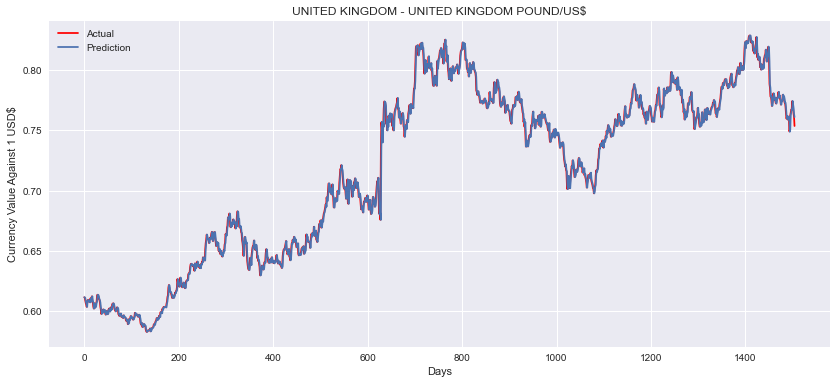

In [37]:
# plotting the graph of actual vs prediction

'''
red line (which shows actual values) will be there in graph, you will see the glimpse of it. This will reflect the 
correctness of model in case of red line not being shown clearly in graph which means it's going nearest with green line.
'''

plt.figure(figsize=(14, 6))
plt.plot(test_data, color='red', label='Actual')
plt.plot(predicted_values, label='Prediction')
plt.title(selected_currency)
plt.xlabel('Days')
plt.ylabel('Currency Value Against 1 USD$')
plt.legend(loc='upper left')

plt.show()


# AIMS COMPLETED

## Completed all aims set at the start of this notebook.

1. Successfully performed Timeseries Analysis on Forex Exchange Dataset, covering all historical aspects of it

2. Cleaned and Transformed the Forex Exchange Rate dataset successfully in a way that we were able to effectively perform Timeseries Analysis on it and also applied ARIMA MODEL (Machine Learning Algorithm), as both required cleaned, numerical, data without missing values.

3. Perfomed visualization of Timeseries Analysis done on Forex exchange dataset, which includes Yearly, Monthly, and Day-wise plotting of each currency exchange rate in the dataset.

4. Successfully build ARIMA MODEL (Machine Learning Algorithm) and applied it on forex exchange data by using 70% of existing data to train the model and tested on remaining 30%. As a result, we can now make use of this model to predict future values of each currency exchange rate.